# Tempreture Forcast project

In [203]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.4/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 0.7/99.8 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 0.9/99.8 MB 4.0 MB/s eta 0:00:25
   ---------------------------------------- 1.2/99.8 MB 3.9 MB/s eta 0:00:26
    --------------------------------------- 1.6/99.8 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.6/99.8 MB 4.8 MB/s eta 0:00:21
    ---------------------------------

In [204]:
!pip install xgboost


In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib


import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools


# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay


# Models from SkLearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor


# allow plots to appear directly in the notebook
%matplotlib inline


from subprocess import check_output
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset

df= pd.read_csv("C:\\phase 2\\temperature.csv")

In [3]:
df.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   
5         29.219342         23.822613  6.182295   50.231389  ...         0.0   
6         28.551859         24.238467  5.587135  125.110007  ...         0.0   
7         28.851982         23.819054  6.104417   42.011547  ...         0.0   
8         28.426975         23.332373  6.017135   85.110971  ...         0.0   
9         27.576705         22.527018  6.518841   63.006075  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   
5         0.0         0.0  37.5102  127.042   54.6384  0.1457   
6         0.0         0.0  37.5776  126.838   12.3700  0.0985   
7         0.0         0.0  37.4697  126.910   52.5180  1.5629   
8         0.0         0.0  37.4967  126.826   50.9312  0.4125   
9         0.0         0.0  37.4562  126.955  208.5070  5.1782   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  
5      5873.780762       31.5       24.0  
6      5849.233398       30.9       23.4  
7      5863.992188       31.1       22.9  
8      5876.901367       31.3       21.6  
9      5893.608398       30.5       21.0  

[10 rows x 25 columns]

In [4]:
df.tail(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7742  ...    0.000000    0.000000    0.000000  37.4832  127.024   56.4448   
7743  ...    0.000000    0.000000    0.000000  37.5776  126.938   75.0924   
7744  ...    0.000000    0.000000    0.000000  37.6181  127.004  146.5540   
7745  ...    0.000000    0.000000    0.000000  37.5507  127.040   26.2980   
7746  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7742  1.231300      4435.611816       27.8       16.7  
7743  1.767800      4495.473633       27.1       16.6  
7744  4.729600      4554.965332       26.7       16.3  
7745  0.572100      4456.024414       27.6       17.7  
7746  0.133200      4441.803711       28.0       17.1  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[10 rows x 25 columns]

In [5]:
df.shape

(7752, 25)

In [6]:
df.describe

<bound method NDFrame.describe of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         2

In [7]:
#To check Null values in the dataset
df.isnull()

station   Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       False  False         False         False        False        False   
1       False  False         False         False        False        False   
2       False  False         False         False        False        False   
3       False  False         False         False        False        False   
4       False  False         False         False        False        False   
...       ...    ...           ...           ...          ...          ...   
7747    False  False         False         False        False        False   
7748    False  False         False         False        False        False   
7749    False  False         False         False        False        False   
7750     True   True         False         False        False        False   
7751     True   True         False         False        False        False   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...  LDAPS_PPT2  \
0                False             False     False     False  ...       False   
1                False             False     False     False  ...       False   
2                False             False     False     False  ...       False   
3                False             False     False     False  ...       False   
4                False             False     False     False  ...       False   
...                ...               ...       ...       ...  ...         ...   
7747             False             False     False     False  ...       False   
7748             False             False     False     False  ...       False   
7749             False             False     False     False  ...       False   
7750             False             False     False     False  ...       False   
7751             False             False     False     False  ...       False   

      LDAPS_PPT3  LDAPS_PPT4    lat    lon    DEM  Slope  Solar radiation  \
0          False       False  False  False  False  False            False   
1          False       False  False  False  False  False            False   
2          False       False  False  False  False  False            False   
3          False       False  False  False  False  False            False   
4          False       False  False  False  False  False            False   
...          ...         ...    ...    ...    ...    ...              ...   
7747       False       False  False  False  False  False            False   
7748       False       False  False  False  False  False            False   
7749       False       False  False  False  False  False            False   
7750       False       False  False  False  False  False            False   
7751       False       False  False  False  False  False            False   

      Next_Tmax  Next_Tmin  
0         False      False  
1         False      False  
2         False      False  
3         False      False  
4         False      False  
...         ...        ...  
7747      False      False  
7748      False      False  
7749      False      False  
7750      False      False  
7751      False      False  

[7752 rows x 25 columns]

In [8]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [10]:
#Convert Date column into separate datetime object
df['Date']=pd.to_datetime(df['Date'])

In [11]:
# Fill null values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Fill null values with a constant
df.fillna(value=0, inplace=True)


In [12]:
#extract the day,month, and year components
df['day'] =df['Date'].dt.day
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year

In [13]:
df.head(5)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   month  year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [14]:
#convert day, month and year column data type into int.
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['station']= df['station'].astype(int)

In [15]:
# Rounding the float 
#df['']=df[''].apply(lambda x:round(x,2)
df=df.round(2)


In [16]:
df.head(10)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0        1 2013-06-30          28.7          21.4        58.26        91.12   
1        2 2013-06-30          31.9          21.6        52.26        90.60   
2        3 2013-06-30          31.6          23.3        48.69        83.97   
3        4 2013-06-30          32.0          23.4        58.24        96.48   
4        5 2013-06-30          31.4          21.9        56.17        90.16   
5        6 2013-06-30          31.9          23.5        52.44        85.31   
6        7 2013-06-30          31.4          24.4        56.29        81.02   
7        8 2013-06-30          32.1          23.6        52.33        78.00   
8        9 2013-06-30          31.4          22.0        55.34        80.78   
9       10 2013-06-30          31.6          20.5        56.65        86.85   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...    lat     lon  \
0             28.07             23.01      6.82     69.45  ...  37.60  126.99   
1             29.85             24.04      5.69     51.94  ...  37.60  127.03   
2             30.09             24.57      6.14     20.57  ...  37.58  127.06   
3             29.70             23.33      5.65     65.73  ...  37.65  127.02   
4             29.11             23.49      5.74    107.97  ...  37.55  127.14   
5             29.22             23.82      6.18     50.23  ...  37.51  127.04   
6             28.55             24.24      5.59    125.11  ...  37.58  126.84   
7             28.85             23.82      6.10     42.01  ...  37.47  126.91   
8             28.43             23.33      6.02     85.11  ...  37.50  126.83   
9             27.58             22.53      6.52     63.01  ...  37.46  126.96   

      DEM  Slope  Solar radiation  Next_Tmax  Next_Tmin  day  month  year  
0  212.34   2.78          5992.90       29.1       21.2   30      6  2013  
1   44.76   0.51          5869.31       30.5       22.5   30      6  2013  
2   33.31   0.27          5863.56       31.1       23.9   30      6  2013  
3   45.72   2.53          5856.96       31.7       24.3   30      6  2013  
4   35.04   0.51          5859.55       31.2       22.5   30      6  2013  
5   54.64   0.15          5873.78       31.5       24.0   30      6  2013  
6   12.37   0.10          5849.23       30.9       23.4   30      6  2013  
7   52.52   1.56          5863.99       31.1       22.9   30      6  2013  
8   50.93   0.41          5876.90       31.3       21.6   30      6  2013  
9  208.51   5.18          5893.61       30.5       21.0   30      6  2013  

[10 rows x 28 columns]

Now to gain more insight in data, we will create additional columns with location of station in terms of city and respective state.

In [17]:
pip install reverse_geocoder


Note: you may need to restart the kernel to use updated packages.


In [18]:
# Importing Reverse geocoder
import reverse_geocoder as rg
import pprint

In [19]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


<b> We have gather state and city name as per corresponding to it's latitude and longitude available. Now it is time incorporate state and city columns in our dataset.</b>

In [20]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [21]:
df.head(10).round(2)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0        1 2013-06-30          28.7          21.4        58.26        91.12   
1        2 2013-06-30          31.9          21.6        52.26        90.60   
2        3 2013-06-30          31.6          23.3        48.69        83.97   
3        4 2013-06-30          32.0          23.4        58.24        96.48   
4        5 2013-06-30          31.4          21.9        56.17        90.16   
5        6 2013-06-30          31.9          23.5        52.44        85.31   
6        7 2013-06-30          31.4          24.4        56.29        81.02   
7        8 2013-06-30          32.1          23.6        52.33        78.00   
8        9 2013-06-30          31.4          22.0        55.34        80.78   
9       10 2013-06-30          31.6          20.5        56.65        86.85   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...     DEM  Slope  \
0             28.07             23.01      6.82     69.45  ...  212.34   2.78   
1             29.85             24.04      5.69     51.94  ...   44.76   0.51   
2             30.09             24.57      6.14     20.57  ...   33.31   0.27   
3             29.70             23.33      5.65     65.73  ...   45.72   2.53   
4             29.11             23.49      5.74    107.97  ...   35.04   0.51   
5             29.22             23.82      6.18     50.23  ...   54.64   0.15   
6             28.55             24.24      5.59    125.11  ...   12.37   0.10   
7             28.85             23.82      6.10     42.01  ...   52.52   1.56   
8             28.43             23.33      6.02     85.11  ...   50.93   0.41   
9             27.58             22.53      6.52     63.01  ...  208.51   5.18   

   Solar radiation  Next_Tmax  Next_Tmin  day  month  year        State  \
0          5992.90       29.1       21.2   30      6  2013        Seoul   
1          5869.31       30.5       22.5   30      6  2013        Seoul   
2          5863.56       31.1       23.9   30      6  2013  Gyeonggi-do   
3          5856.96       31.7       24.3   30      6  2013        Seoul   
4          5859.55       31.2       22.5   30      6  2013  Gyeonggi-do   
5          5873.78       31.5       24.0   30      6  2013        Seoul   
6          5849.23       30.9       23.4   30      6  2013  Gyeonggi-do   
7          5863.99       31.1       22.9   30      6  2013  Gyeonggi-do   
8          5876.90       31.3       21.6   30      6  2013  Gyeonggi-do   
9          5893.61       30.5       21.0   30      6  2013  Gyeonggi-do   

         City  
0       Seoul  
1       Seoul  
2     Guri-si  
3       Seoul  
4     Guri-si  
5       Seoul  
6   Goyang-si  
7  Kwangmyong  
8  Kwangmyong  
9   Anyang-si  

[10 rows x 30 columns]

In [22]:
df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']].describe(include='all').round(2)

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count       7752.00       7752.00      7752.00      7752.00           7752.00   
mean          29.77         23.23        56.76        88.37             29.61   
std            2.96          2.40        14.60         7.16              2.93   
min           20.00         11.30        19.79        58.94             17.62   
25%           27.80         21.70        46.05        84.32             27.69   
50%           29.90         23.40        55.32        89.70             29.66   
75%           32.00         24.90        67.04        93.70             31.68   
max           37.60         29.90        98.52       100.00             38.54   

       LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
count           7752.00   7752.00   7752.00    7752.00    7752.00  ...   
mean              23.51      7.10     62.51       0.37       0.36  ...   
std                2.33      2.17     33.57       0.26       0.26  ...   
min               14.27      2.88    -13.60       0.00       0.00  ...   
25%               22.11      5.69     37.53       0.15       0.14  ...   
50%               23.74      6.56     57.31       0.32       0.32  ...   
75%               25.13      8.01     83.91       0.57       0.55  ...   
max               29.62     21.86    213.41       0.97       0.97  ...   

       LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM    Slope  \
count     7752.00     7752.00     7752.00  7752.00  7752.00  7752.00  7752.00   
mean         0.48        0.28        0.27    37.55   126.99    61.87     1.26   
std          1.75        1.16        1.20     0.05     0.08    54.28     1.37   
min          0.00        0.00        0.00    37.46   126.83    12.37     0.10   
25%          0.00        0.00        0.00    37.51   126.94    28.70     0.27   
50%          0.00        0.00        0.00    37.55   127.00    45.72     0.62   
75%          0.02        0.01        0.00    37.58   127.04    59.83     1.77   
max         21.62       15.84       16.66    37.65   127.14   212.34     5.18   

       Solar radiation  Next_Tmax  Next_Tmin  
count          7752.00    7752.00    7752.00  
mean           5341.50      30.27      22.93  
std             429.16       3.12       2.48  
min            4329.52      17.40      11.30  
25%            4999.02      28.20      21.40  
50%            5436.34      30.50      23.10  
75%            5728.32      32.60      24.60  
max            5992.90      38.90      29.80  

[8 rows x 23 columns]

#Exploring present temperature

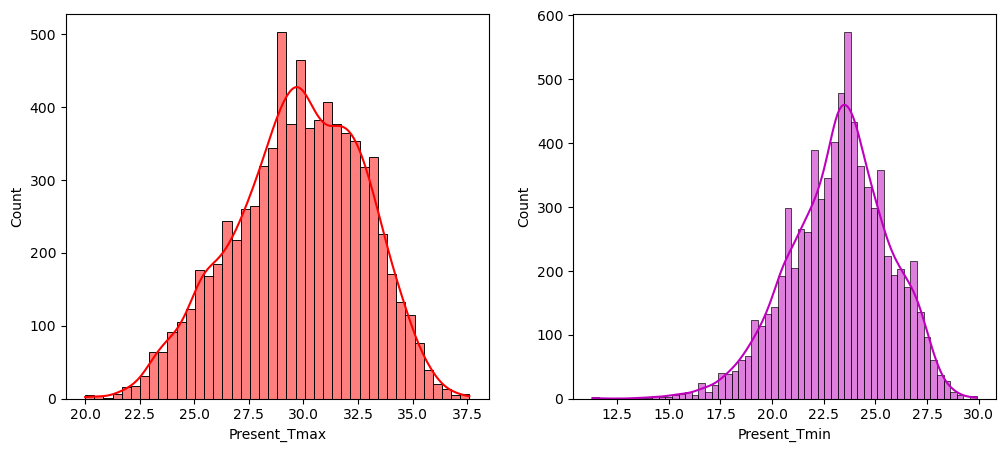

In [23]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

__Comment:__
1. For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.
2. For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

In [24]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.768227554179568
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.225103199174406


# Checking wgen minima and maxima occurs

In [25]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station                Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717       18 2016-08-11 00:00:00          37.6          26.8        44.25   
7751       13 2015-07-30 21:36:00          37.6          29.9        98.52   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
5717        87.75             34.79             27.15      6.37    111.23   
7751       100.00             38.54             29.62     21.86    213.41   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717       0.22       0.09       0.00       0.00         0.0        0.00   
7751       0.97       0.97       0.98       0.97        23.7       21.62   

      LDAPS_PPT3  LDAPS_PPT4    lat     lon     DEM  Slope  Solar radiation  \
5717        0.00        0.00  37.48  127.02   56.44   1.23          5082.56   
7751       15.84       16.66  37.65  127.14  212.34   5.18          5992.90   

      Next_Tmax  Next_Tmin  day  month  year        State     City  
5717       37.0       27.8   11      8  2016        Seoul    Seoul  
7751       38.9       29.8   30      7  2015  Gyeonggi-do  Guri-si

In [26]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station                Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725        1 2017-08-30 00:00:00          20.0          15.1        35.65   
7750       13 2015-07-30 21:36:00          20.0          11.3        19.79   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
7725        89.97             24.32             16.13      7.09    108.98   
7750        58.94             17.62             14.27      2.88    -13.60   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725       0.05       0.01        0.0        0.0         0.0         0.0   
7750       0.00       0.00        0.0        0.0         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4    lat     lon     DEM  Slope  Solar radiation  \
7725         0.0         0.0  37.60  126.99  212.34   2.78          4614.76   
7750         0.0         0.0  37.46  126.83   12.37   0.10          4329.52   

      Next_Tmax  Next_Tmin  day  month  year        State        City  
7725       23.8       15.1   30      8  2017        Seoul       Seoul  
7750       17.4       11.3   30      7  2015  Gyeonggi-do  Kwangmyong

In [27]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station                Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397       23 2014-08-02 00:00:00          35.3          29.9        53.95   
7751       13 2015-07-30 21:36:00          37.6          29.9        98.52   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
2397        85.99             30.91             25.44     13.01    117.84   
7751       100.00             38.54             29.62     21.86    213.41   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397       0.68       0.45       0.76       0.64        1.67        0.01   
7751       0.97       0.97       0.98       0.97       23.70       21.62   

      LDAPS_PPT3  LDAPS_PPT4    lat     lon     DEM  Slope  Solar radiation  \
2397        0.25        0.00  37.54  126.89   15.59   0.16          5360.23   
7751       15.84       16.66  37.65  127.14  212.34   5.18          5992.90   

      Next_Tmax  Next_Tmin  day  month  year        State        City  
2397       31.3       24.8    2      8  2014  Gyeonggi-do  Kwangmyong  
7751       38.9       29.8   30      7  2015  Gyeonggi-do     Guri-si

In [28]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station                Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116       17 2016-08-27 00:00:00          27.1          11.3        62.79   
7750       13 2015-07-30 21:36:00          20.0          11.3        19.79   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116        91.73             23.53             17.96      7.98     84.48   
7750        58.94             17.62             14.27      2.88    -13.60   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116       0.67       0.41       0.45       0.63        0.18         0.0   
7750       0.00       0.00       0.00       0.00        0.00         0.0   

      LDAPS_PPT3  LDAPS_PPT4    lat     lon    DEM  Slope  Solar radiation  \
6116        0.41        1.02  37.62  127.10  53.47    0.7          4539.62   
7750        0.00        0.00  37.46  126.83  12.37    0.1          4329.52   

      Next_Tmax  Next_Tmin  day  month  year        State        City  
6116       24.6       17.1   27      8  2016  Gyeonggi-do     Guri-si  
7750       17.4       11.3   30      7  2015  Gyeonggi-do  Kwangmyong

#### Observation:
- Present Maximum Temperature <u> Maxima </u>over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
- Present Maximum Temperature <u> Minima </u> over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
- Present Maximum Temperature <u> Maxima </u> over  four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
- Present Maximum Temperature <u> Minima </u> over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.
- We get high value of solar radiation of high temperature day and Low radiation values at low temperature day.
- Maximum Humidity occur when global temeperature minima occur. <b> This might implies that humidity and temperature are inversely related.We will try to verify this. </b>
- Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.

### Let Visualise & gain insight over this by plotting line plot over all station.

<b> Line Plot of Present Temperature Maximum over each Station </b>

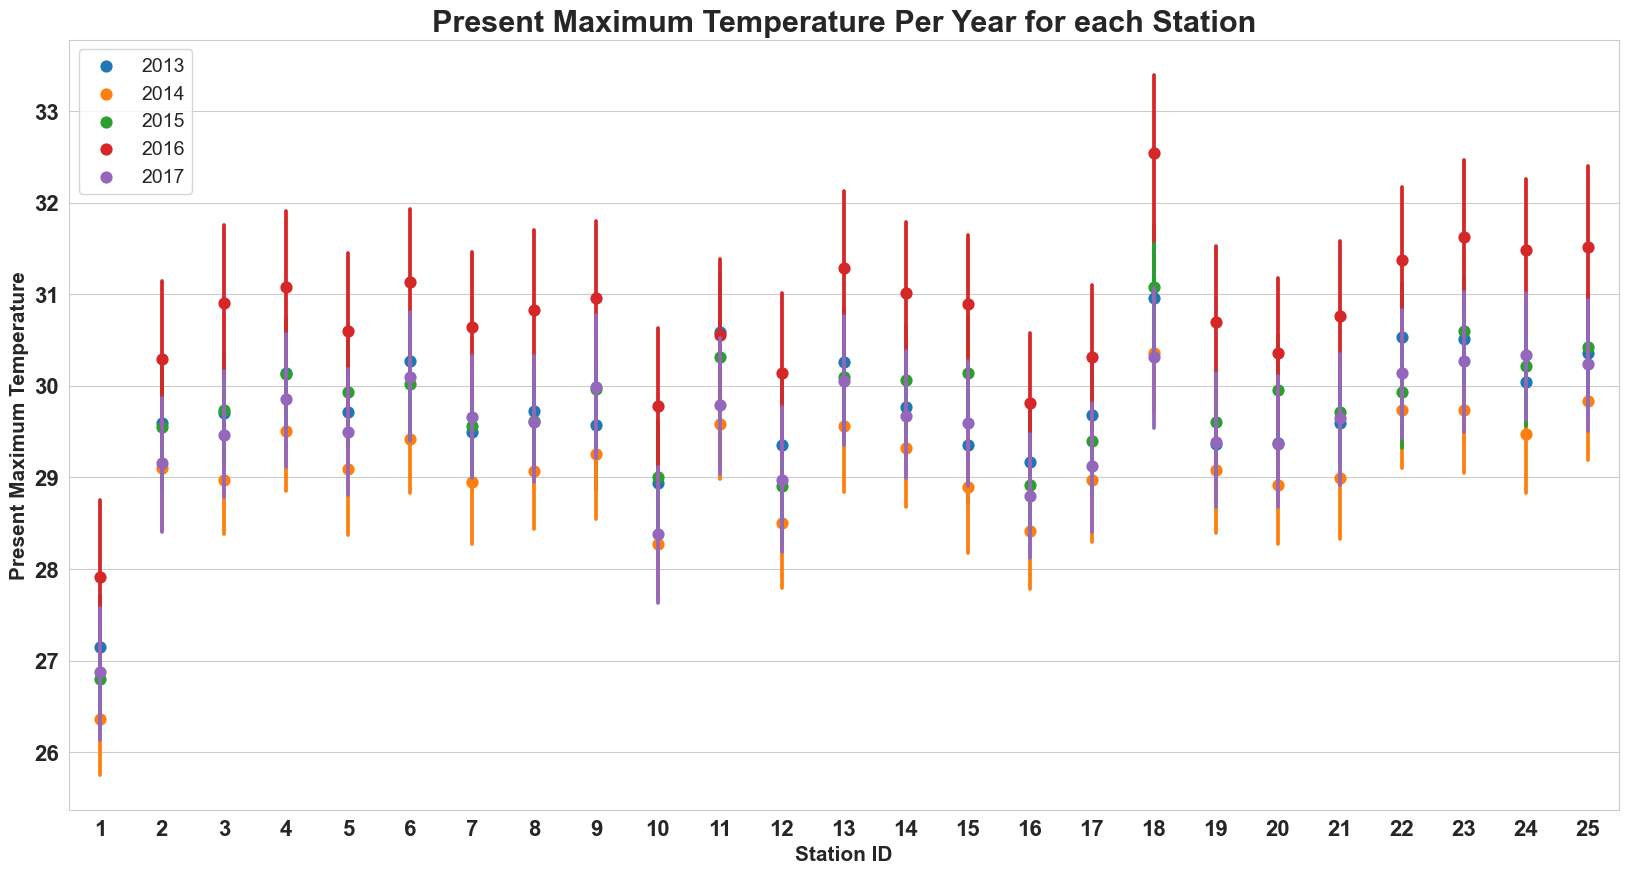

In [29]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

#### Observation on line plot of Present Minimum Temperature:
- Year 2014 is coolest year of all time frame.
- Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. <b>This is implies that over day period minimum temperature drop recorded at station 24.</b>
- Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

<Axes: xlabel='month', ylabel='Solar radiation'>

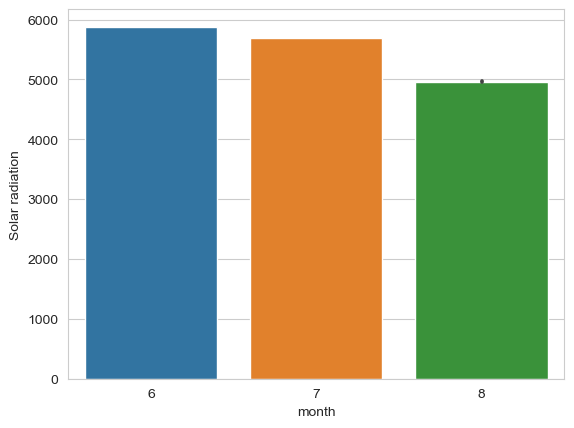

In [30]:
sns.barplot(x=df['month'], y=df['Solar radiation'])

<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

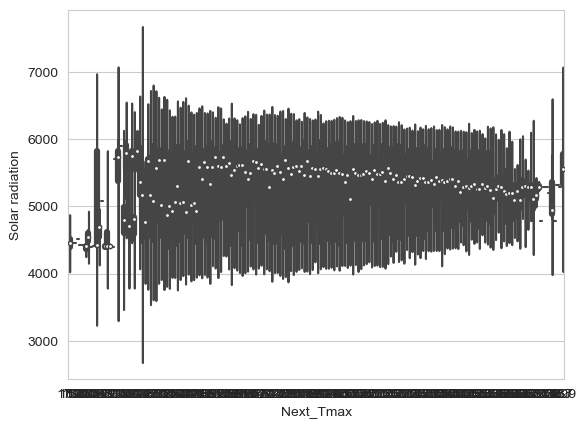

In [31]:
sns.violinplot(x=df['Next_Tmax'], y=df['Solar radiation'])

### Exploration of Target Variable

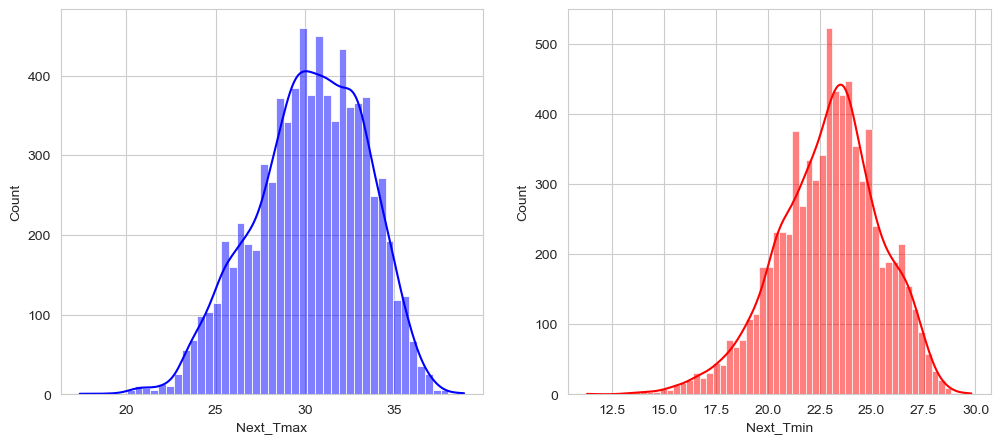

In [32]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

#### Comment:
We get same result as we get in case of present temperature.
- For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

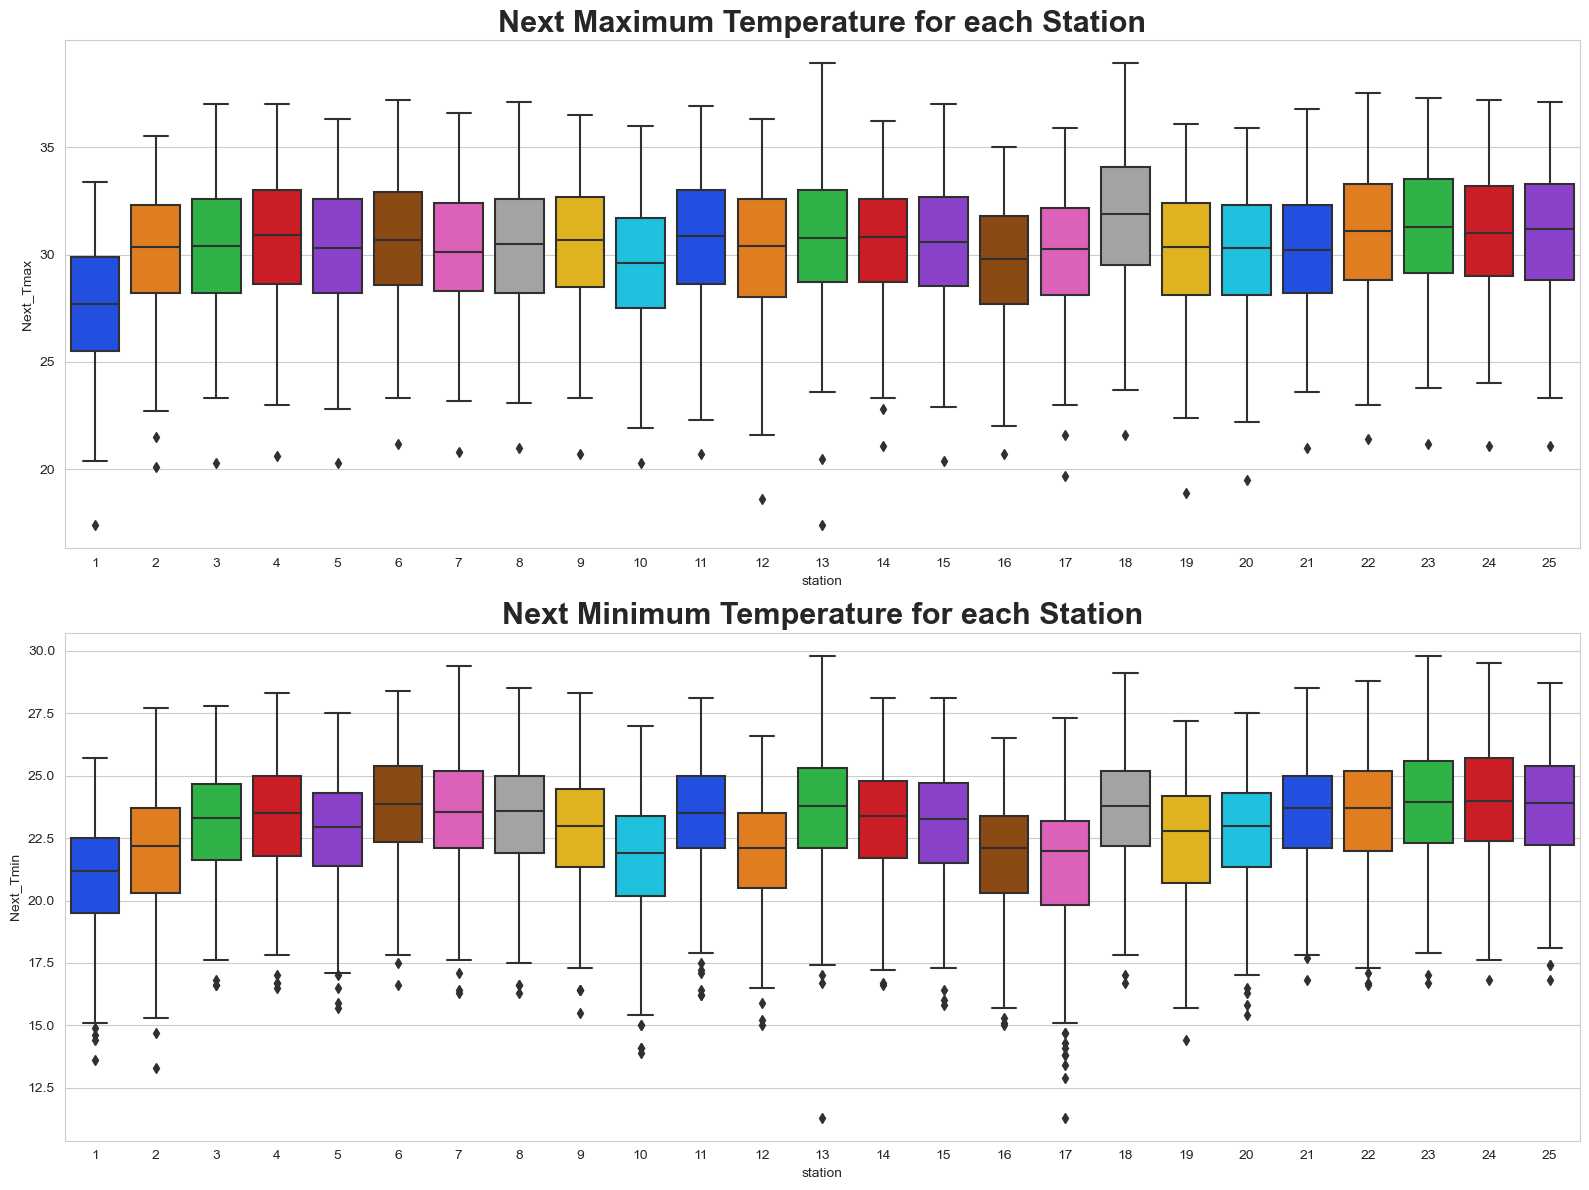

In [33]:


# Corrected boxplot call
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x='station', y='Next_Tmax', data=df, palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')

plt.subplot(2,1,2)
sns.boxplot(x='station', y='Next_Tmin', data=df, palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')

plt.tight_layout()
plt.show()


#### Observation :
From the box plot 
- we can notice the station 13 & 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
- Maximum temperature difference at same station occur in station 17.

### <b>Next Maximum Temperature Vs Cloud cover</b>

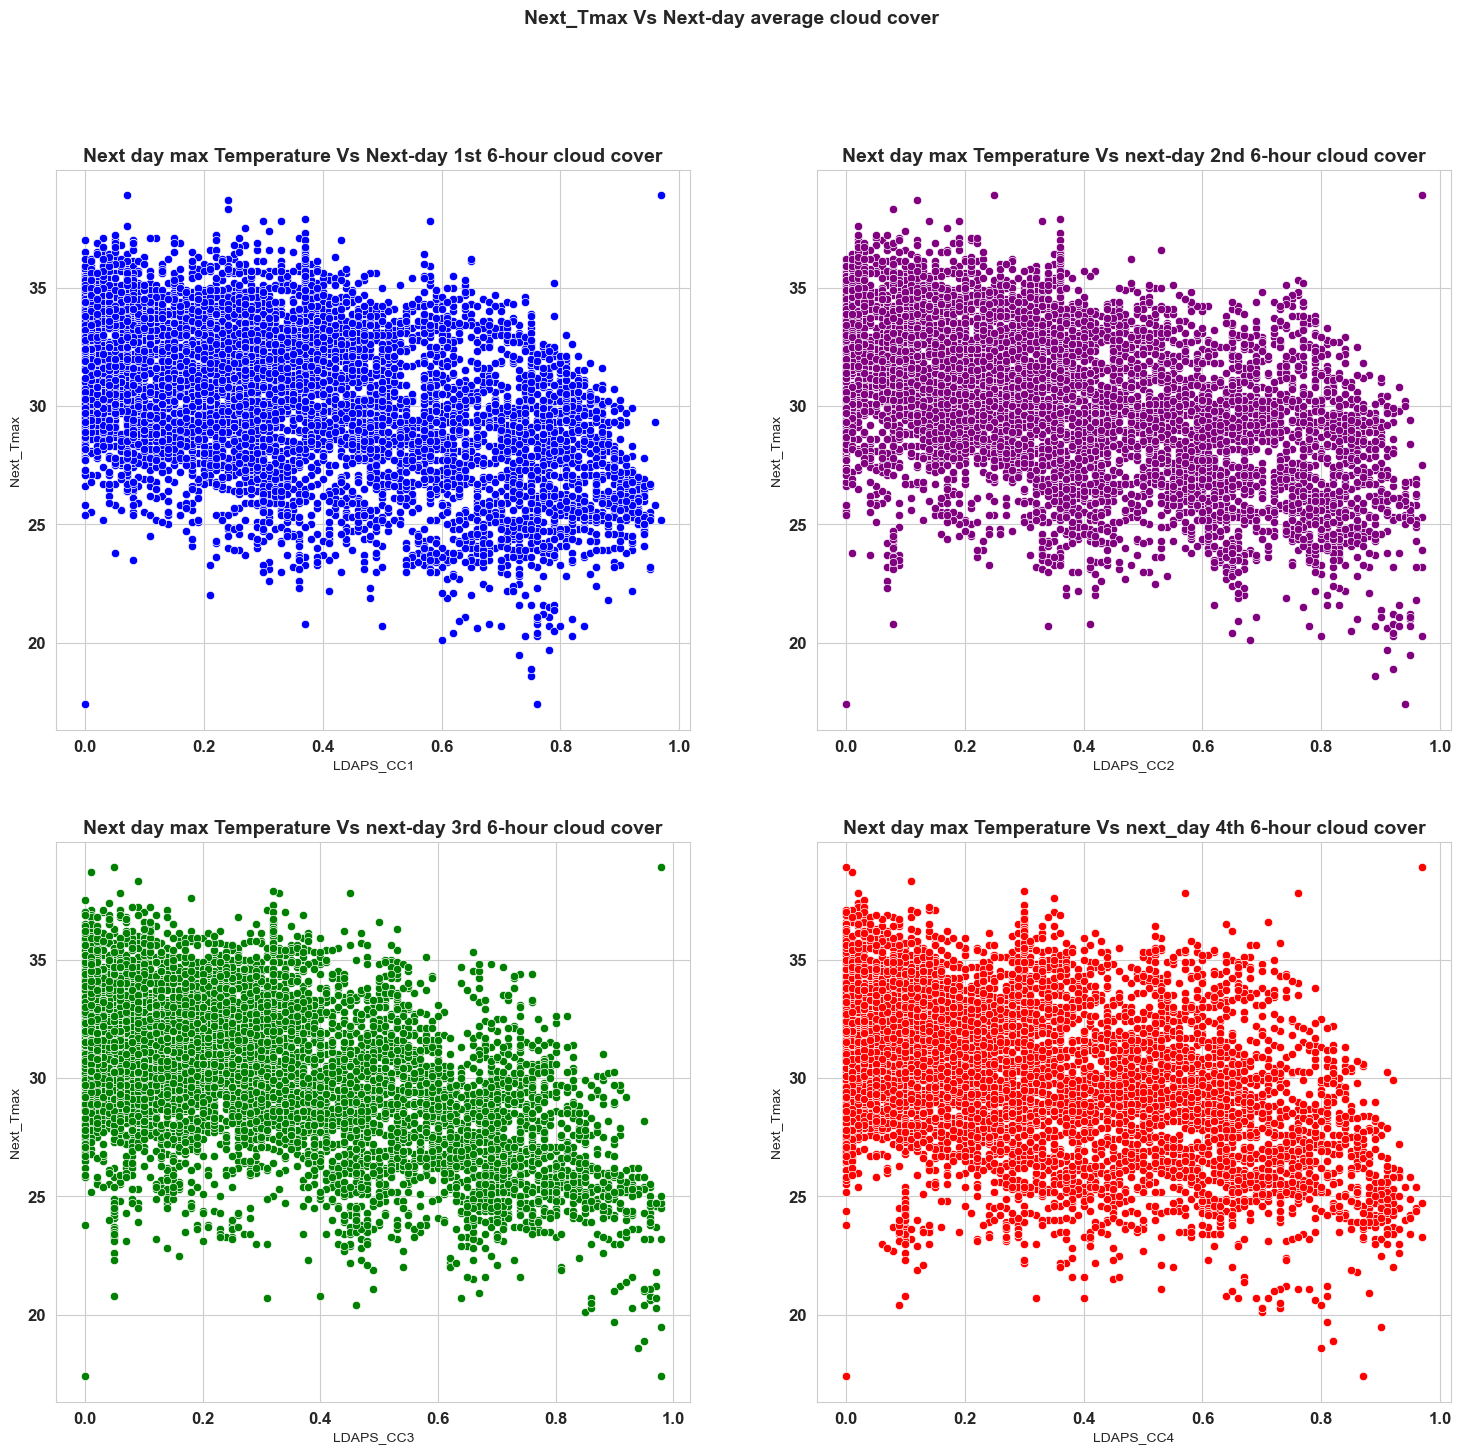

In [34]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation:
<b><em>Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.</em></b>

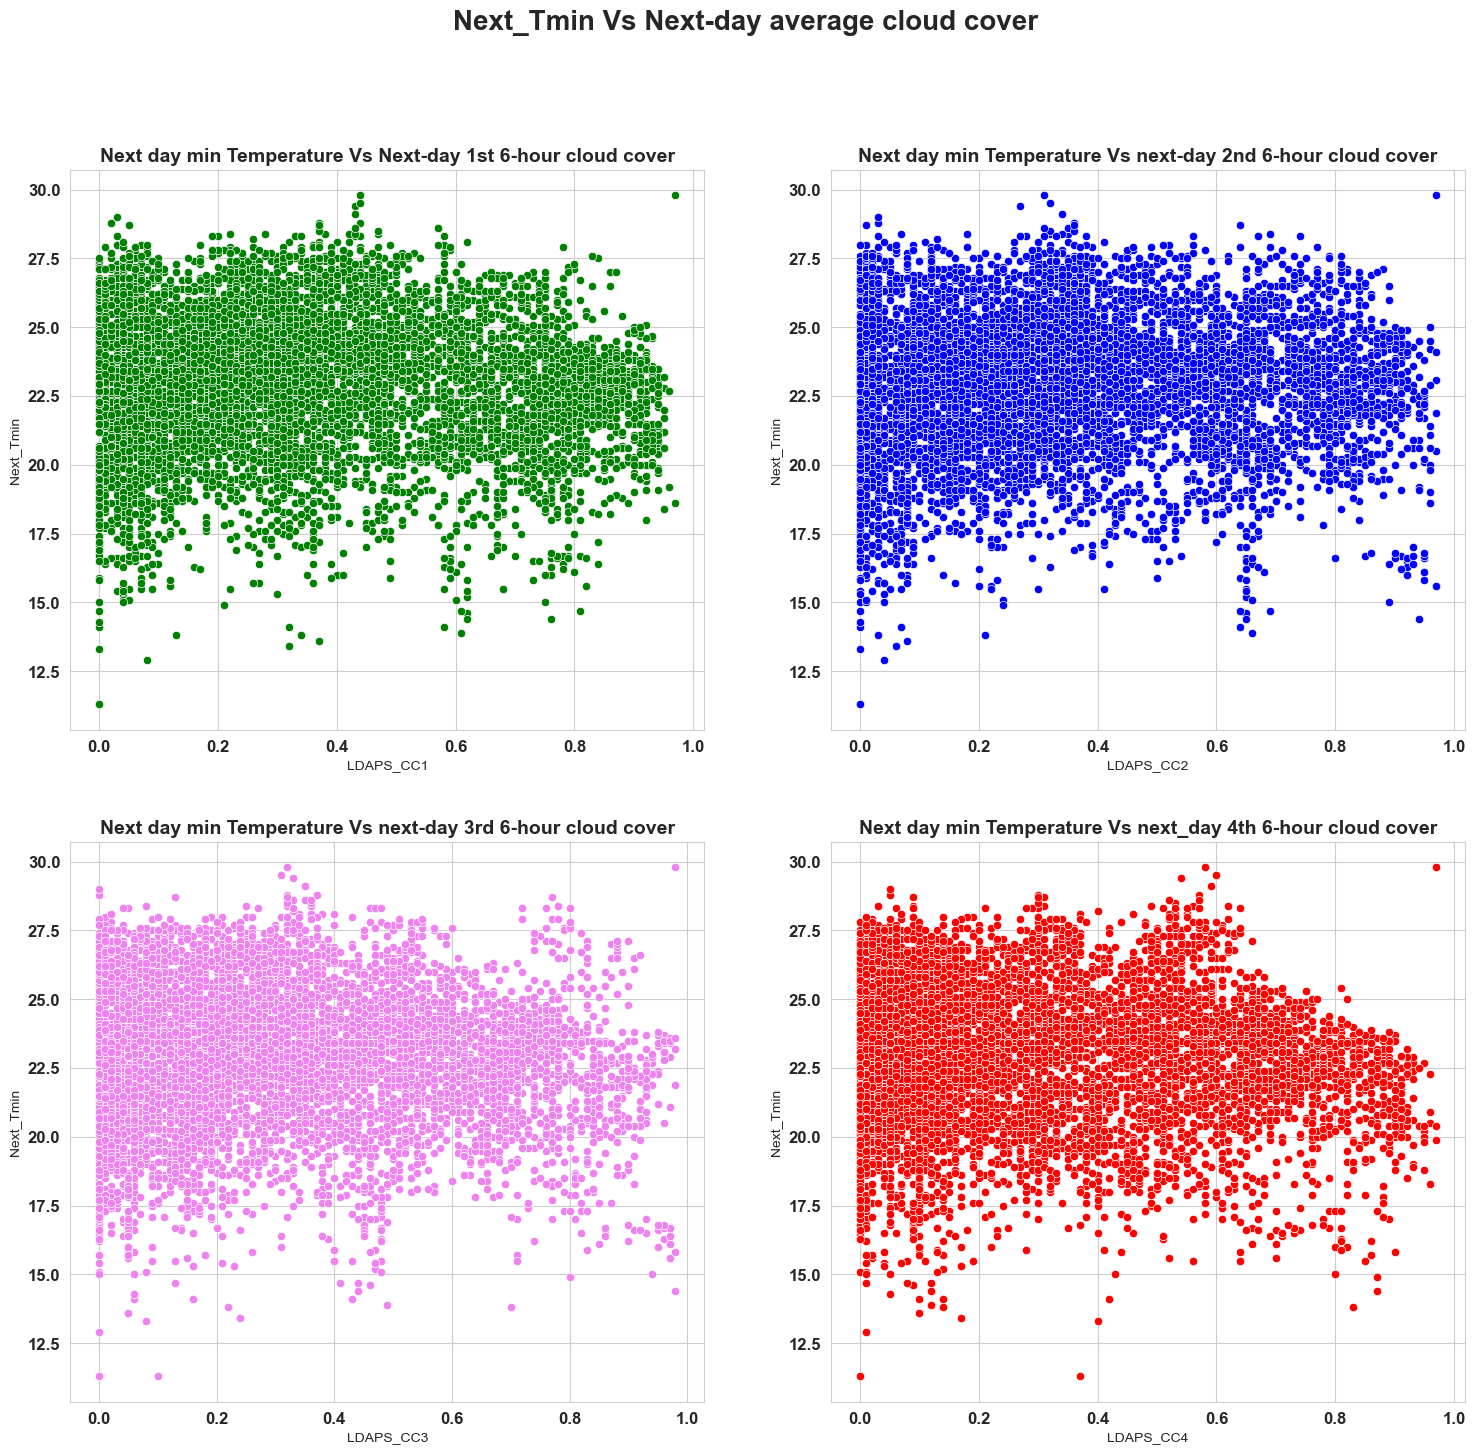

In [35]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation:
<b><em> No significant relation between Next_Tmin and cloud cover in scatterplot. 
    
We can say that Next_Tmin remains unaffected by cloud cover.</em></b>
#### Solar radiation might most impact on Cloud cover and precipitation, its time to explore them.

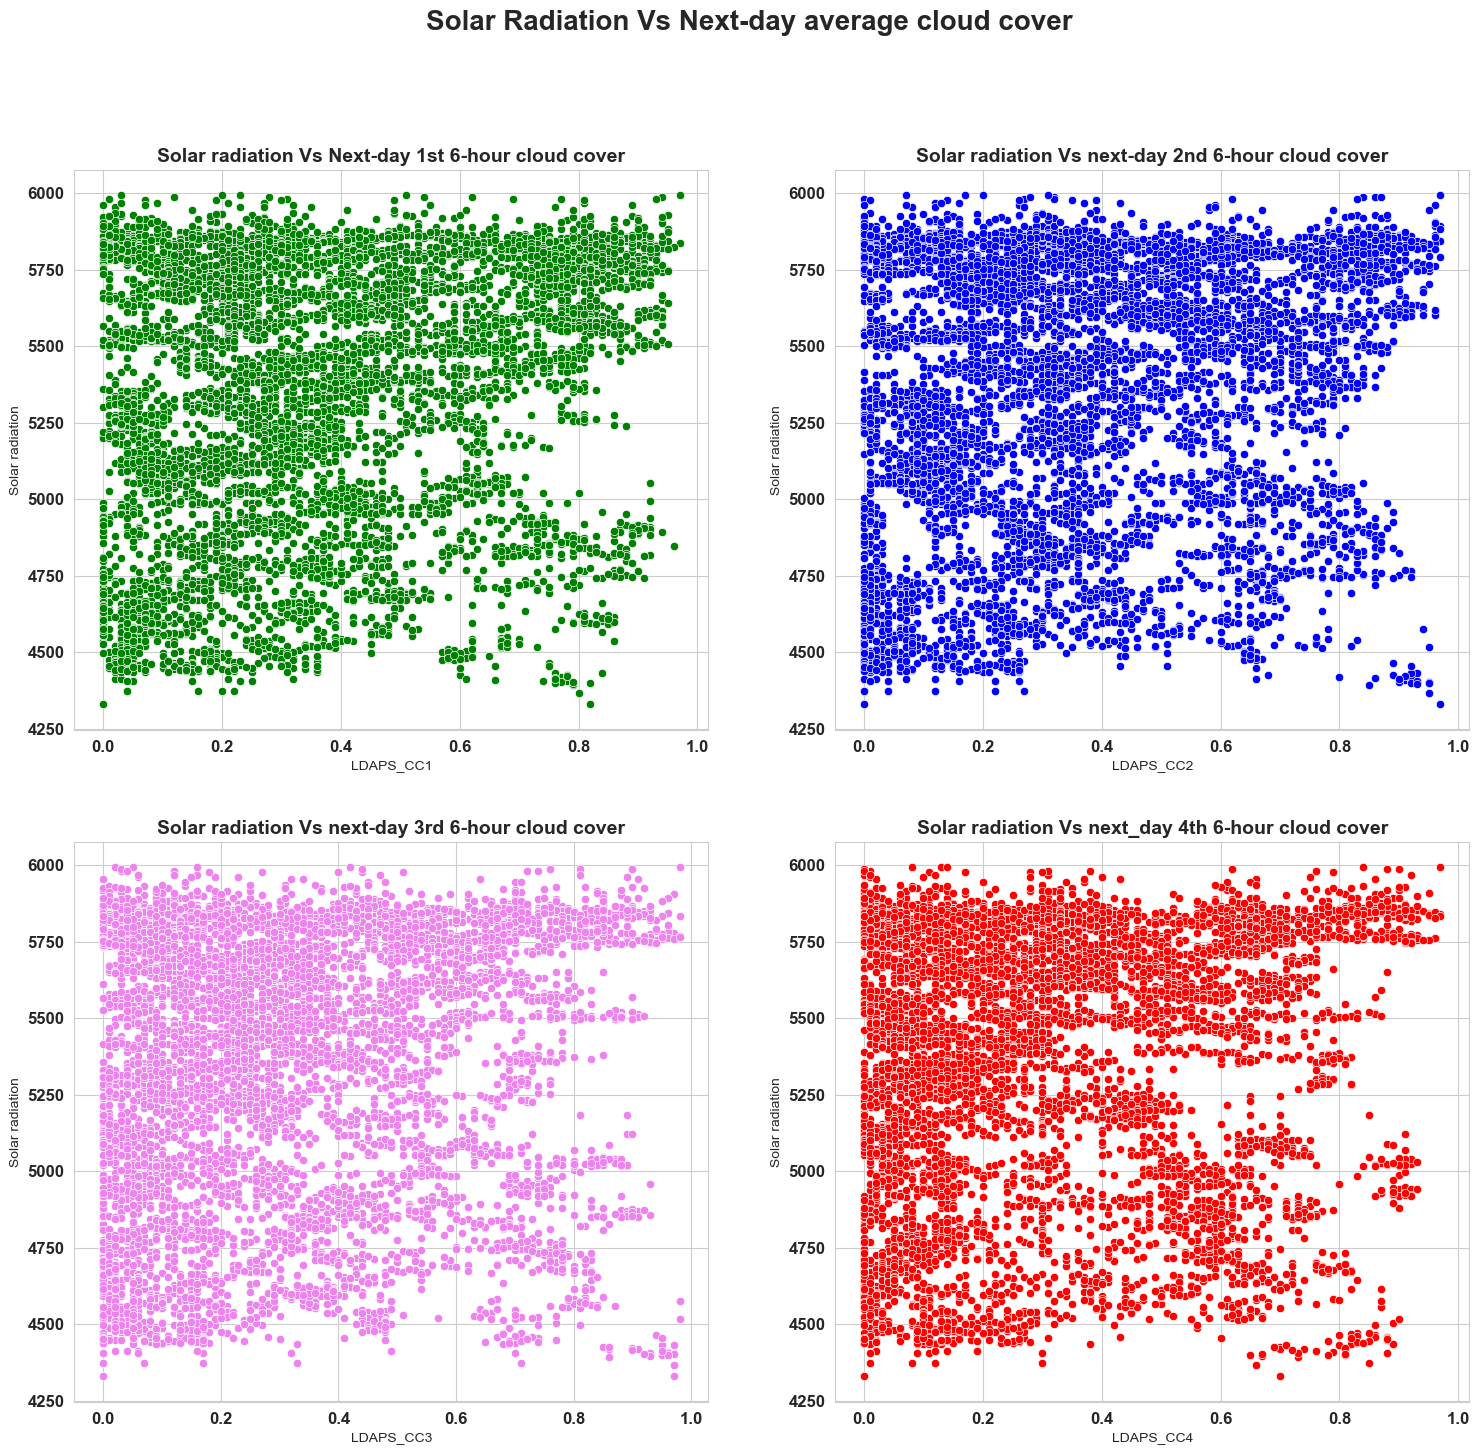

In [36]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation: 
We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.
### Precipitation VS Solar radiation

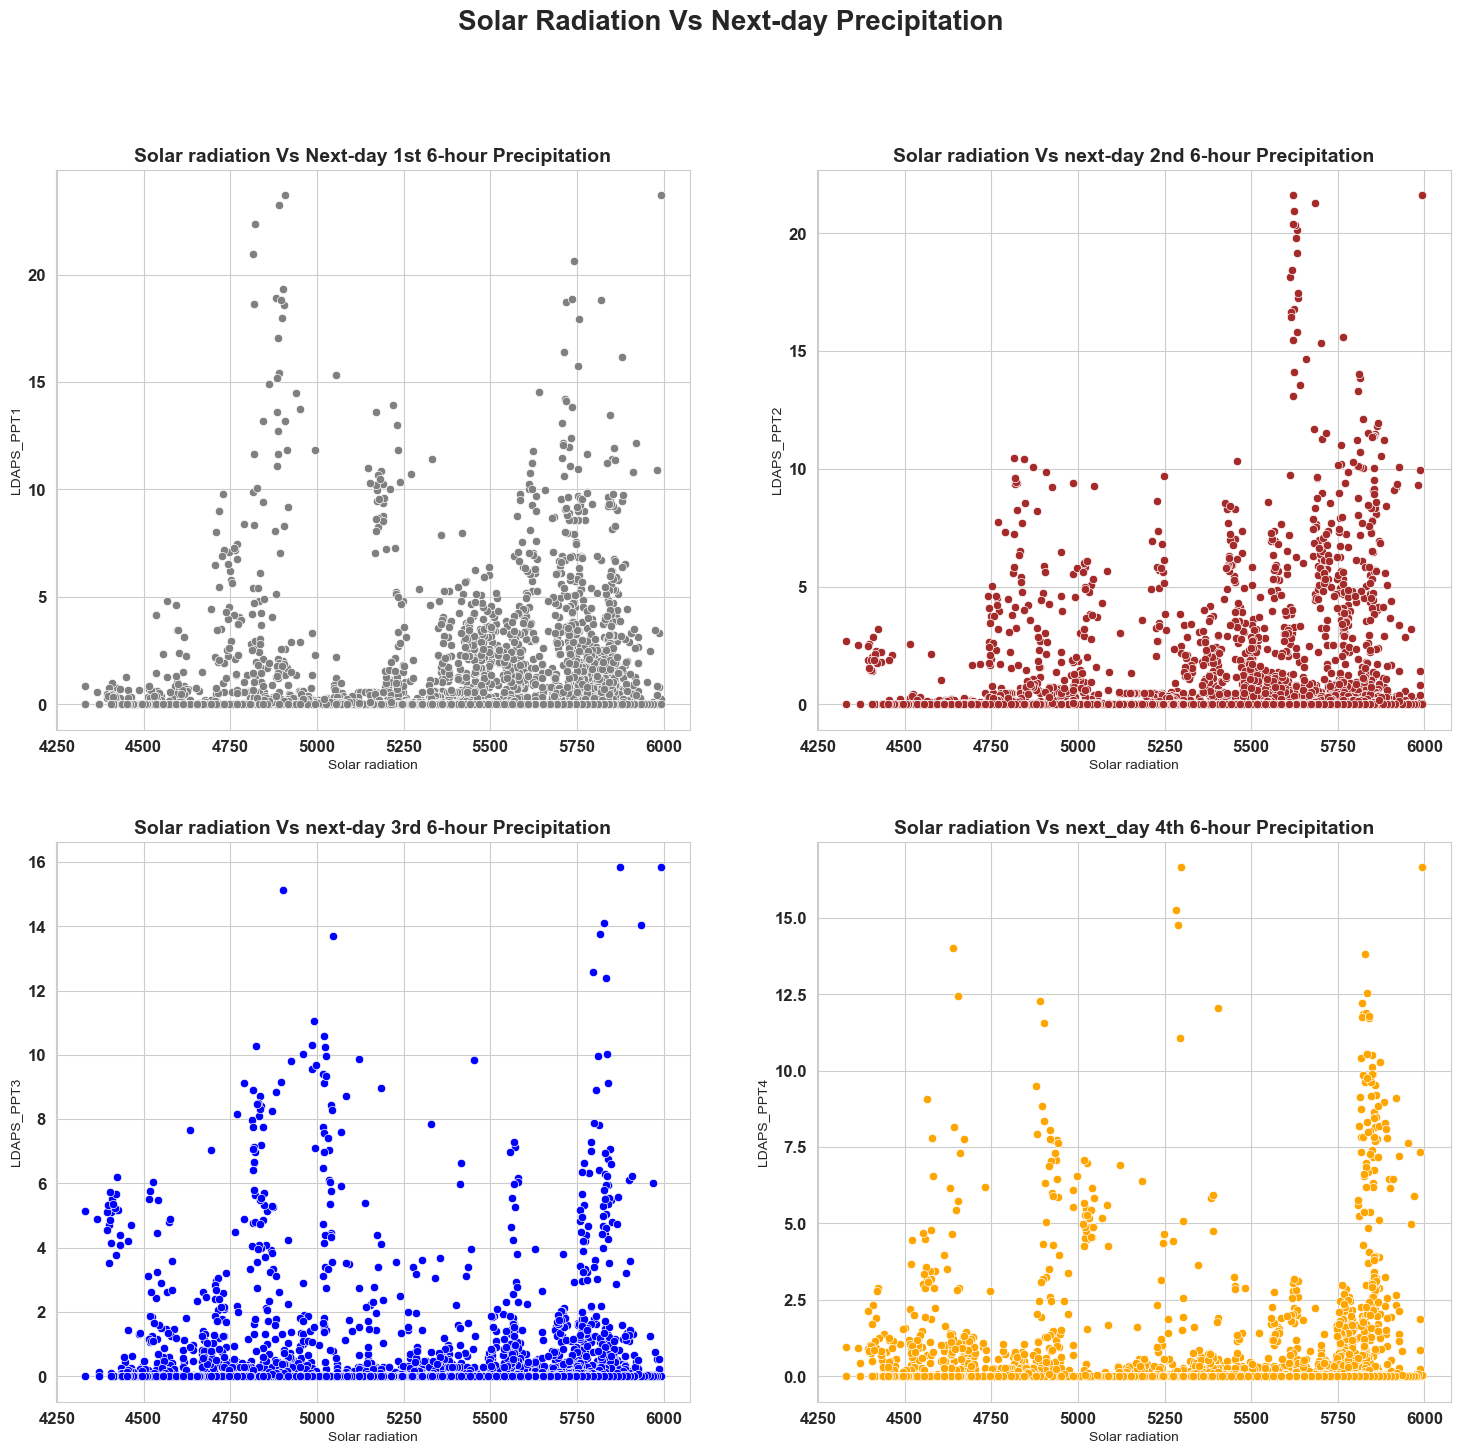

In [37]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation:
- Irrespective of to which 6 hr quarter reading belong,<b> solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).</b>
- if we consider scatterplot of solar radiation vs cloud cover along with above scatter plot,<b> we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.</b>


### <b>This all give rise to few questions here :</b>
1. Where relative humidity and wind speed fit in this equation of precipitation?
2. Latent heat means heat absorption at constant temperature, there has to some effect of latent heat flux variation on relative humidity.
3. Another interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?
4. What is variation in precipitation,cloud cover and wind speed over year period?
5. Variation of temperature over duration of one year period?

### Lets start investigation from last question.

<Axes: xlabel='month', ylabel='LDAPS_PPT1'>

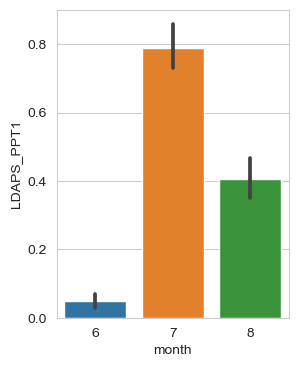

In [40]:
plt.figure(figsize=(3,4))
sns.barplot(x=df['month'], y=df['LDAPS_PPT1'])

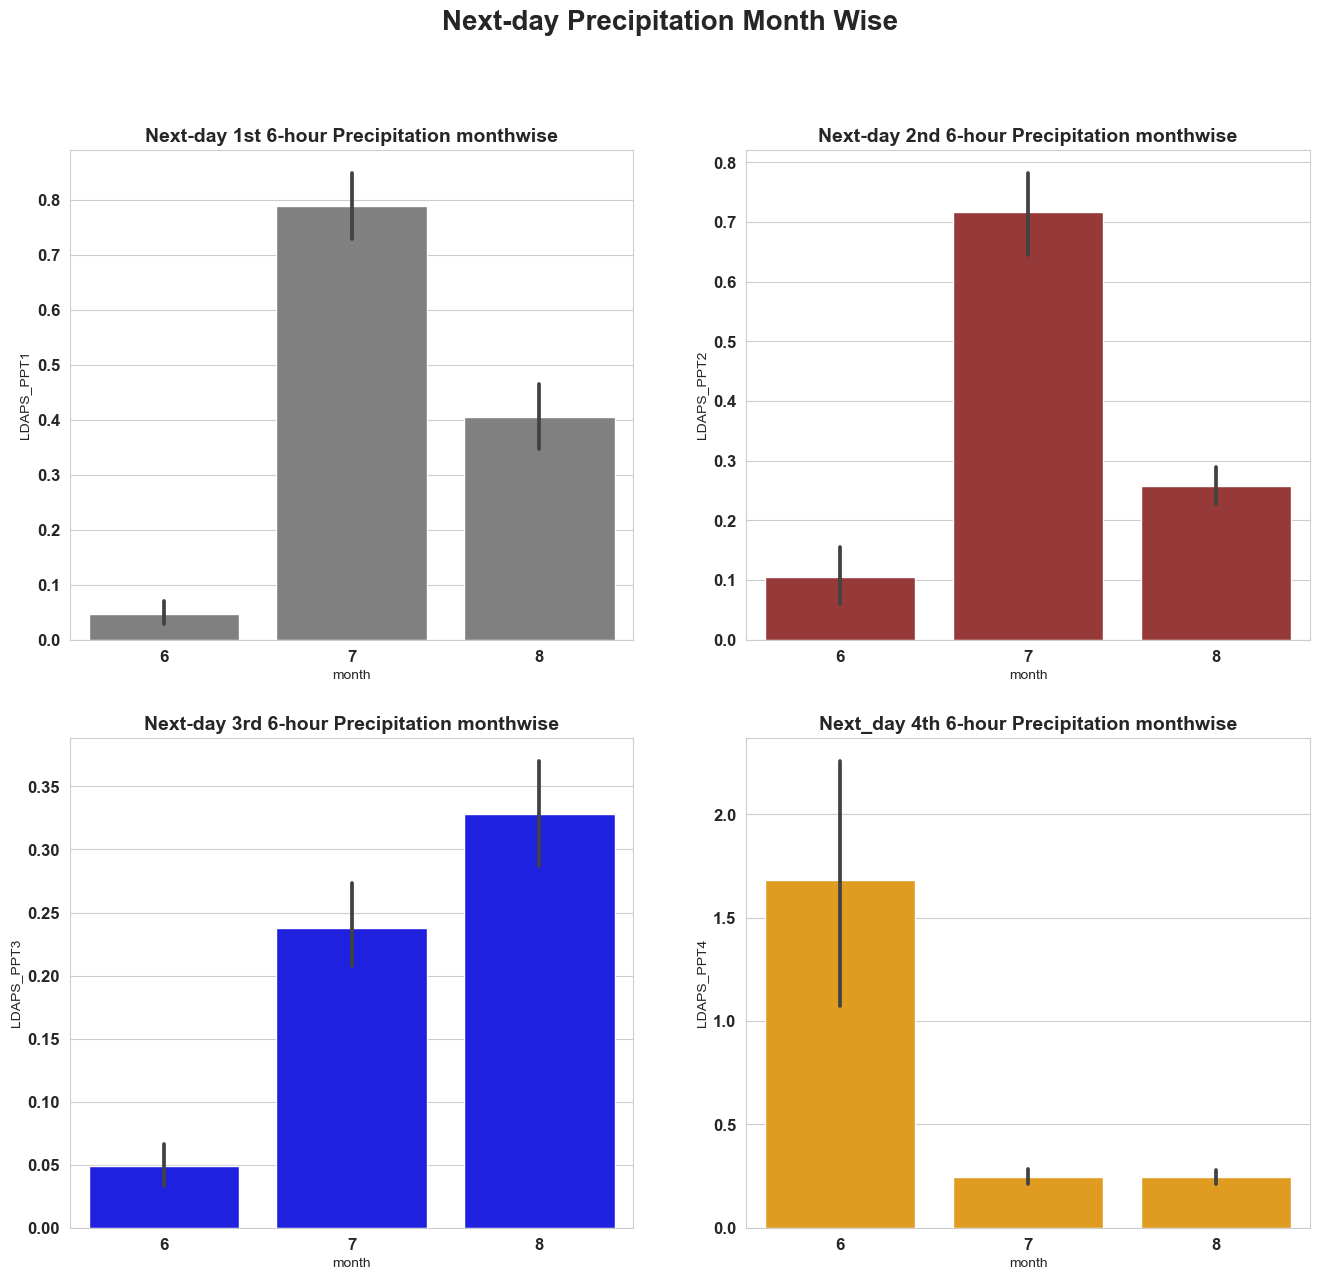

In [41]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Comment :
- In 7th Month highest precipitation observe in 1st quarter of day.
- In 7th Month highest precipitation observe in 2ed quarter of day.
- In 8th Month highest precipitation observe in 3rd quarter of day.
- In 6th Month highest precipitation observe in 4st quarter of day.

Minimum Solar radiation : 4329.52
Maximum Solar radiation : 5992.9
Average Solar radiation : 5341.502886996905


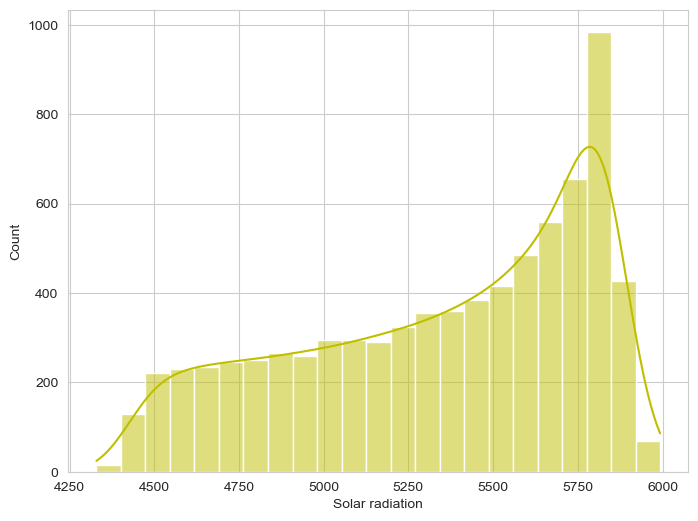

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

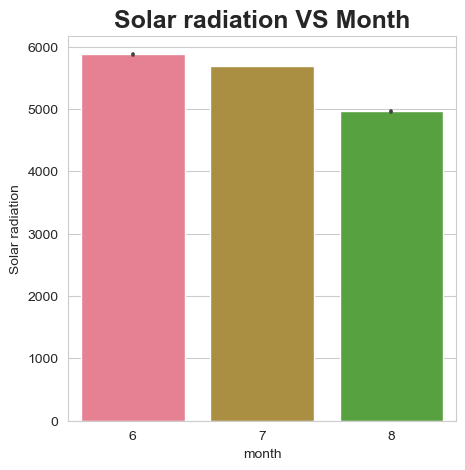

In [43]:
sns.set_palette('husl')
plt.figure(figsize=(5,5))
sns.barplot(y=df['Solar radiation'], x=df['month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

# Solar Radiation is heigher in 6th month.

Minimum Wind Speed : 2.88 m/s
Maximum Wind Speed : 21.86 m/s
Average Wind Speed : 7.097870227038184 m/s


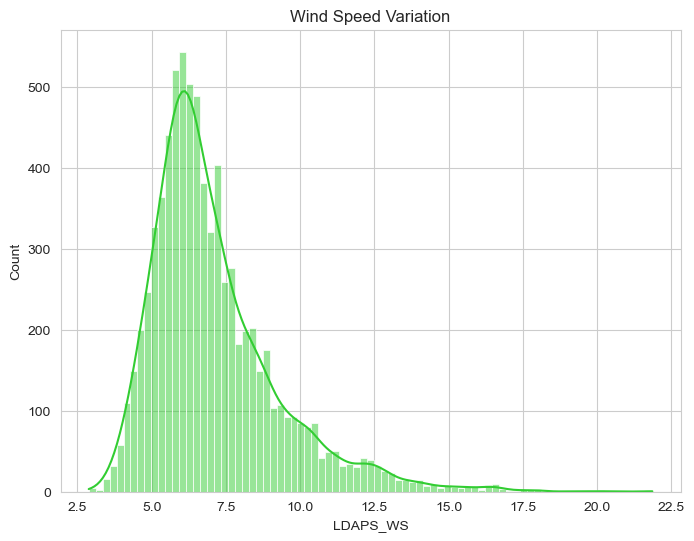

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

#### Comment :
- It have its minimum value at 2.88m/s and maximum values at 21.86m/s 
- For most of reading values lies in the rabge 5m/s to 8m/s
- Graph is slightly right skewed.

Minimum RHmax is 58.94 % and Maximum RHmax is 100.0 %
Minimum RHmin is 19.79 % and Maximum RHmin is 98.52 %


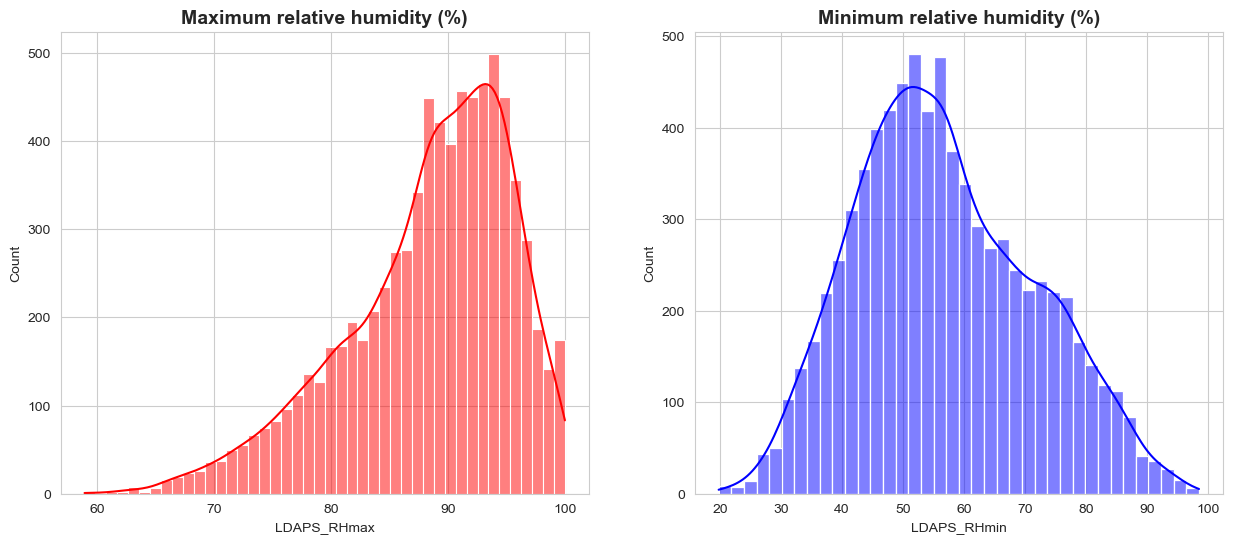

In [45]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

#### Observation :
- Tmax and Tmin for applied lapse rate are almost normally distributed. 
- Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C). 
- Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

Minimum Latent Heat Flux : -13.6
Maximum Latent Heat Flux : 213.41
Average Latent Heat Flux : 62.50511867905057


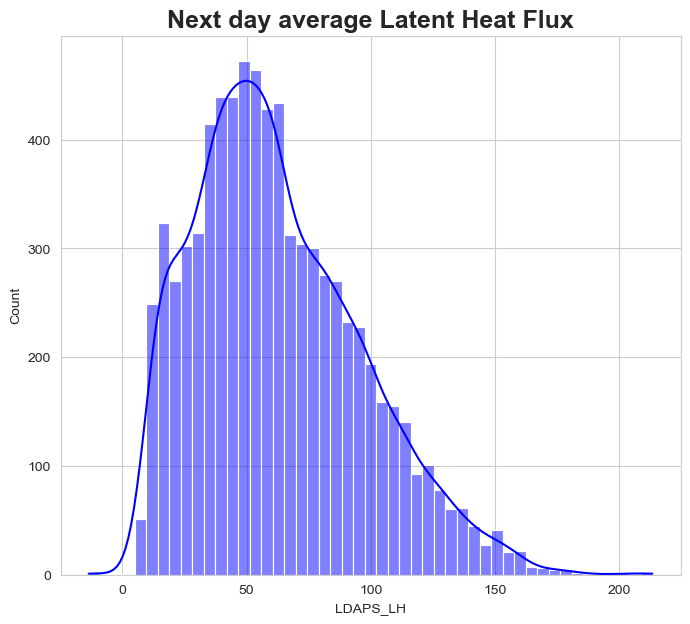

In [46]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

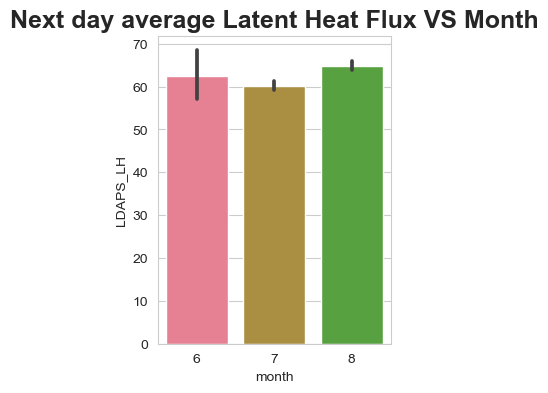

In [47]:
plt.figure(figsize=(3,4))
sns.barplot(y=df['LDAPS_LH'], x=df['month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

**Minimum Latent Heat Flux observe in month of July.**

# Encoding categorical data

In [23]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['station', 'day', 'month', 'year'], datetime64[ns]: ['Date'], float64: ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['State', 'City']}

In [24]:
# Using Label Encoder on categorical variable
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0        1 2013-06-30          28.7          21.4        58.26        91.12   
1        2 2013-06-30          31.9          21.6        52.26        90.60   
2        3 2013-06-30          31.6          23.3        48.69        83.97   
3        4 2013-06-30          32.0          23.4        58.24        96.48   
4        5 2013-06-30          31.4          21.9        56.17        90.16   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  ...     DEM  Slope  \
0             28.07             23.01      6.82     69.45  ...  212.34   2.78   
1             29.85             24.04      5.69     51.94  ...   44.76   0.51   
2             30.09             24.57      6.14     20.57  ...   33.31   0.27   
3             29.70             23.33      5.65     65.73  ...   45.72   2.53   
4             29.11             23.49      5.74    107.97  ...   35.04   0.51   

   Solar radiation  Next_Tmax  Next_Tmin  day  month  year  State  City  
0          5992.90       29.1       21.2   30      6  2013      1     5  
1          5869.31       30.5       22.5   30      6  2013      1     5  
2          5863.56       31.1       23.9   30      6  2013      0     2  
3          5856.96       31.7       24.3   30      6  2013      1     5  
4          5859.55       31.2       22.5   30      6  2013      0     2  

[5 rows x 30 columns]

In [25]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [26]:
df.shape

(7752, 29)

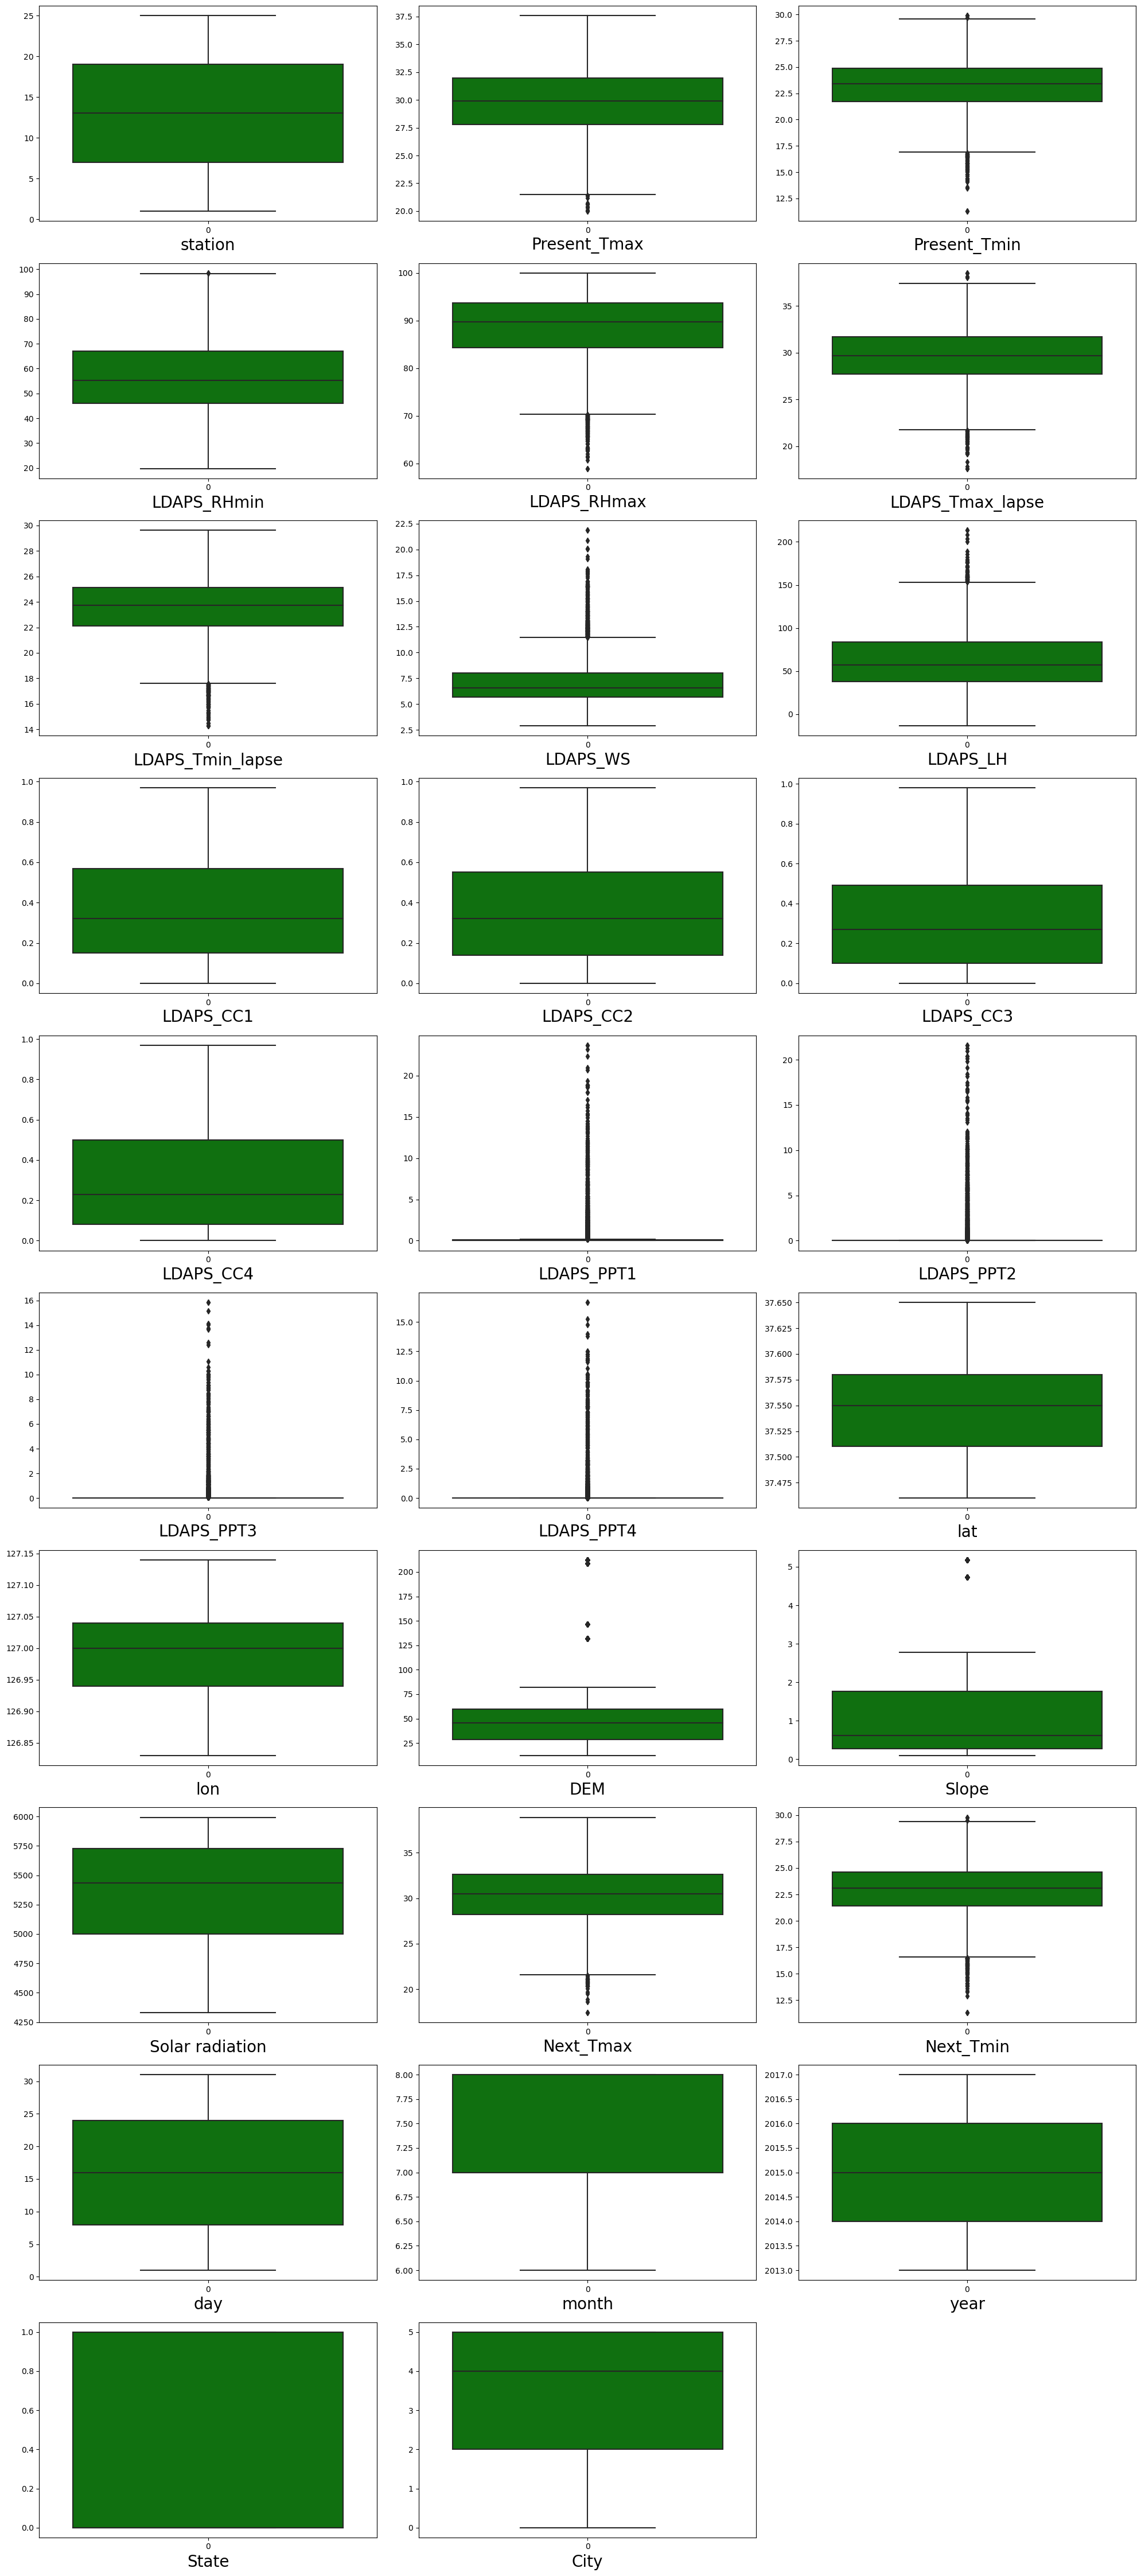

In [27]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

### Outliers removal using Zscore method

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7752, 29)
Shape of the dataframe after removing outliers:  (6894, 29)
Percentage of data loss post outlier removal:  11.06811145510836


We are losing 11.06 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building. 

## 2. Skewness of features

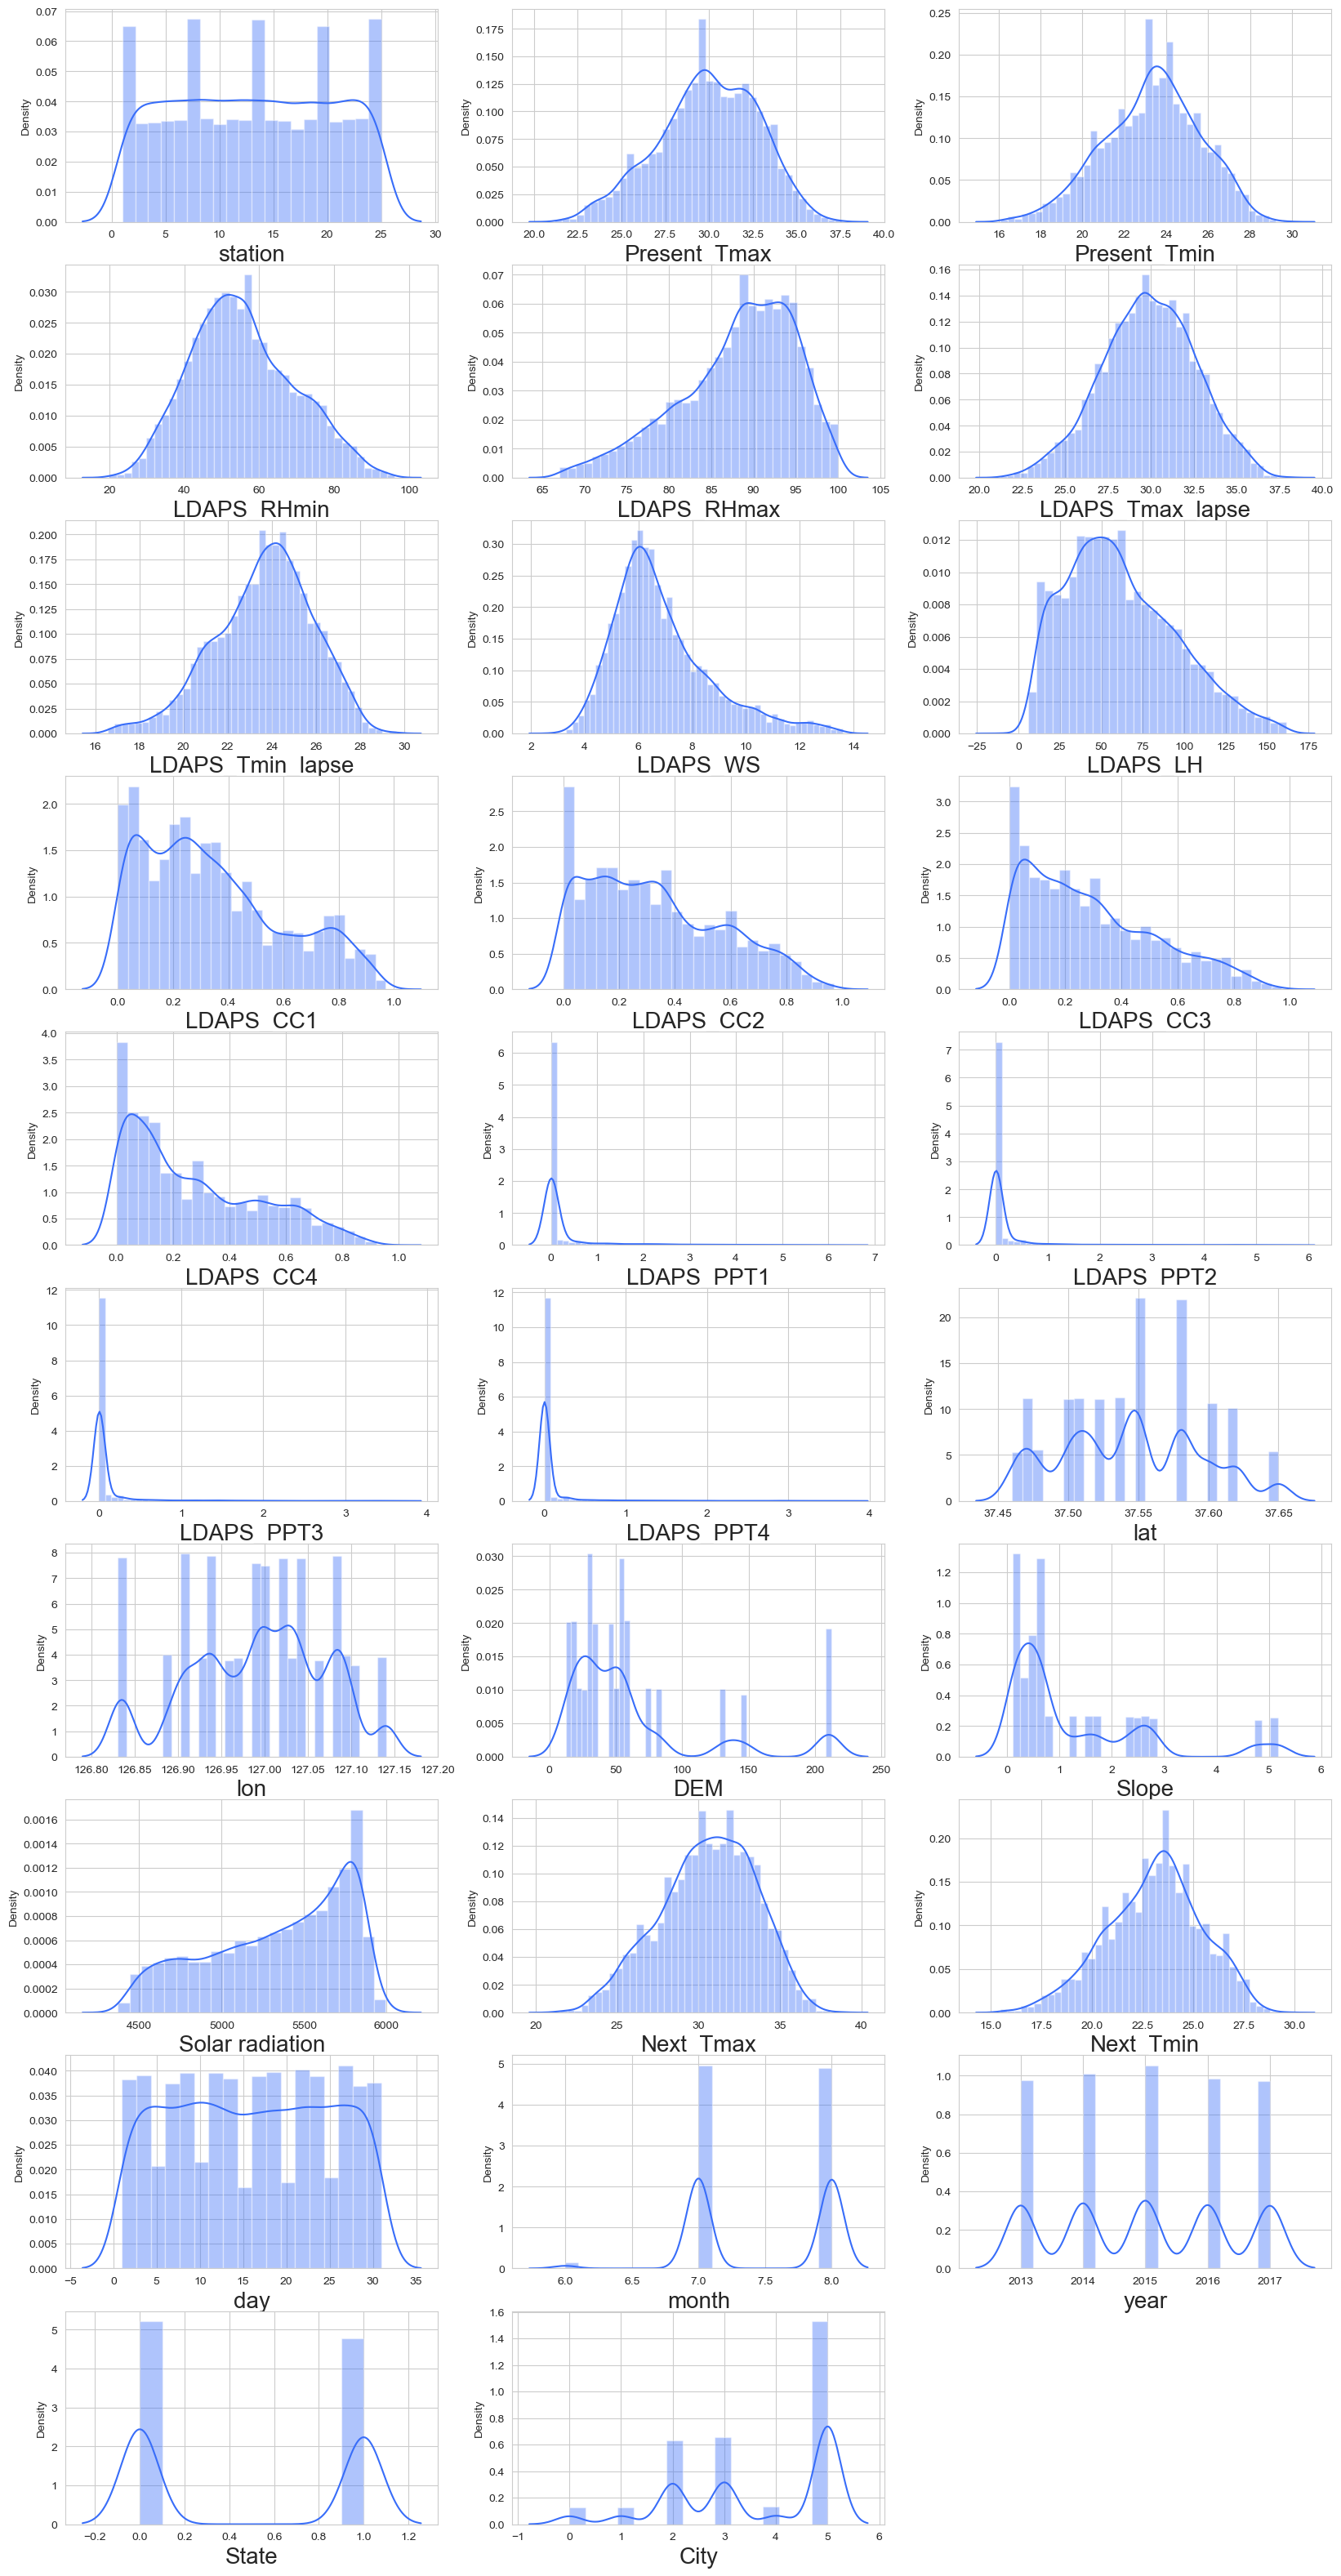

In [54]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

**We also going to ignore sknewness in target feature.**

In [55]:
df.skew()

station             0.002792
Present_Tmax       -0.272671
Present_Tmin       -0.225539
LDAPS_RHmin         0.305736
LDAPS_RHmax        -0.688259
LDAPS_Tmax_lapse   -0.109299
LDAPS_Tmin_lapse   -0.382718
LDAPS_WS            1.087835
LDAPS_LH            0.568777
LDAPS_CC1           0.593346
LDAPS_CC2           0.499321
LDAPS_CC3           0.700021
LDAPS_CC4           0.710539
LDAPS_PPT1          3.731408
LDAPS_PPT2          4.843210
LDAPS_PPT3          5.481646
LDAPS_PPT4          5.926451
lat                 0.156189
lon                -0.240697
DEM                 1.764112
Slope               1.595059
Solar radiation    -0.505353
Next_Tmax          -0.270065
Next_Tmin          -0.237757
day                 0.001007
month              -0.192910
year                0.010998
State               0.087716
City               -0.596126
dtype: float64

**Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.**

In [28]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

**For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced**

## 3. Corrleation 

In [57]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.109475      0.132090    -0.067899   
Present_Tmax      0.109475      1.000000      0.612869    -0.151797   
Present_Tmin      0.132090      0.612869      1.000000     0.150637   
LDAPS_RHmin      -0.067899     -0.151797      0.150637     1.000000   
LDAPS_RHmax      -0.178954     -0.318133     -0.053993     0.565730   
LDAPS_Tmax_lapse  0.066003      0.534687      0.434134    -0.555294   
LDAPS_Tmin_lapse  0.107921      0.615655      0.751652     0.115978   
LDAPS_WS          0.028790     -0.069708      0.037941     0.176960   
LDAPS_LH         -0.135983      0.119139     -0.006325    -0.005216   
LDAPS_CC1         0.009432     -0.286625      0.090640     0.576089   
LDAPS_CC2         0.005948     -0.156107      0.117595     0.714728   
LDAPS_CC3         0.006892     -0.058864      0.047870     0.639435   
LDAPS_CC4         0.011821     -0.048079      0.004710     0.460524   
LDAPS_PPT1       -0.001102     -0.167742      0.094308     0.405775   
LDAPS_PPT2       -0.006721     -0.075323      0.117256     0.496991   
LDAPS_PPT3       -0.003213     -0.001979      0.068278     0.394549   
LDAPS_PPT4       -0.000097      0.000797     -0.022298     0.236999   
lat              -0.244777     -0.048417     -0.068873     0.092113   
lon              -0.123396      0.008928     -0.047385    -0.094532   
DEM              -0.324773     -0.130943     -0.237730     0.057384   
Slope            -0.145777     -0.092672     -0.157404     0.084889   
Solar radiation  -0.031514     -0.103105     -0.053331     0.229504   
Next_Tmax         0.106118      0.586403      0.446657    -0.428027   
Next_Tmin         0.129181      0.616843      0.785261     0.133573   
day               0.005895     -0.120985     -0.074883    -0.074260   
month             0.007209      0.170507      0.107842    -0.182654   
year              0.005841      0.103306      0.097868     0.000860   
State             0.033437     -0.044170     -0.075773     0.001129   
City              0.192028     -0.003700     -0.014653    -0.023553   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.178954          0.066003          0.107921  0.028790   
Present_Tmax        -0.318133          0.534687          0.615655 -0.069708   
Present_Tmin        -0.053993          0.434134          0.751652  0.037941   
LDAPS_RHmin          0.565730         -0.555294          0.115978  0.176960   
LDAPS_RHmax          1.000000         -0.404236         -0.179953  0.064467   
LDAPS_Tmax_lapse    -0.404236          1.000000          0.623594 -0.157999   
LDAPS_Tmin_lapse    -0.179953          0.623594          1.000000 -0.003312   
LDAPS_WS             0.064467         -0.157999         -0.003312  1.000000   
LDAPS_LH             0.282049          0.007203         -0.141738 -0.056395   
LDAPS_CC1            0.427689         -0.417068          0.023732  0.208457   
LDAPS_CC2            0.373414         -0.494464          0.086819  0.160732   
LDAPS_CC3            0.146581         -0.471548          0.029742  0.071838   
LDAPS_CC4            0.049931         -0.371865         -0.022419  0.093880   
LDAPS_PPT1           0.408812         -0.303498         -0.055290  0.204991   
LDAPS_PPT2           0.353162         -0.337689          0.017286  0.170497   
LDAPS_PPT3           0.206348         -0.277435         -0.020369  0.099969   
LDAPS_PPT4           0.112645         -0.202567         -0.085825  0.172447   
lat                  0.236201         -0.038768         -0.091748 -0.029052   
lon                  0.010690          0.103219         -0.029396 -0.077519   
DEM                  0.173595         -0.111674         -0.176132  0.114279   
Slope                0.209650         -0.107157         -0.161000  0.096026   
Solar radiation      0.156192         -0.033399          0.014311  0.161616   
Next_Tmax           -0.323649          0.805654          0.542099 -0.20

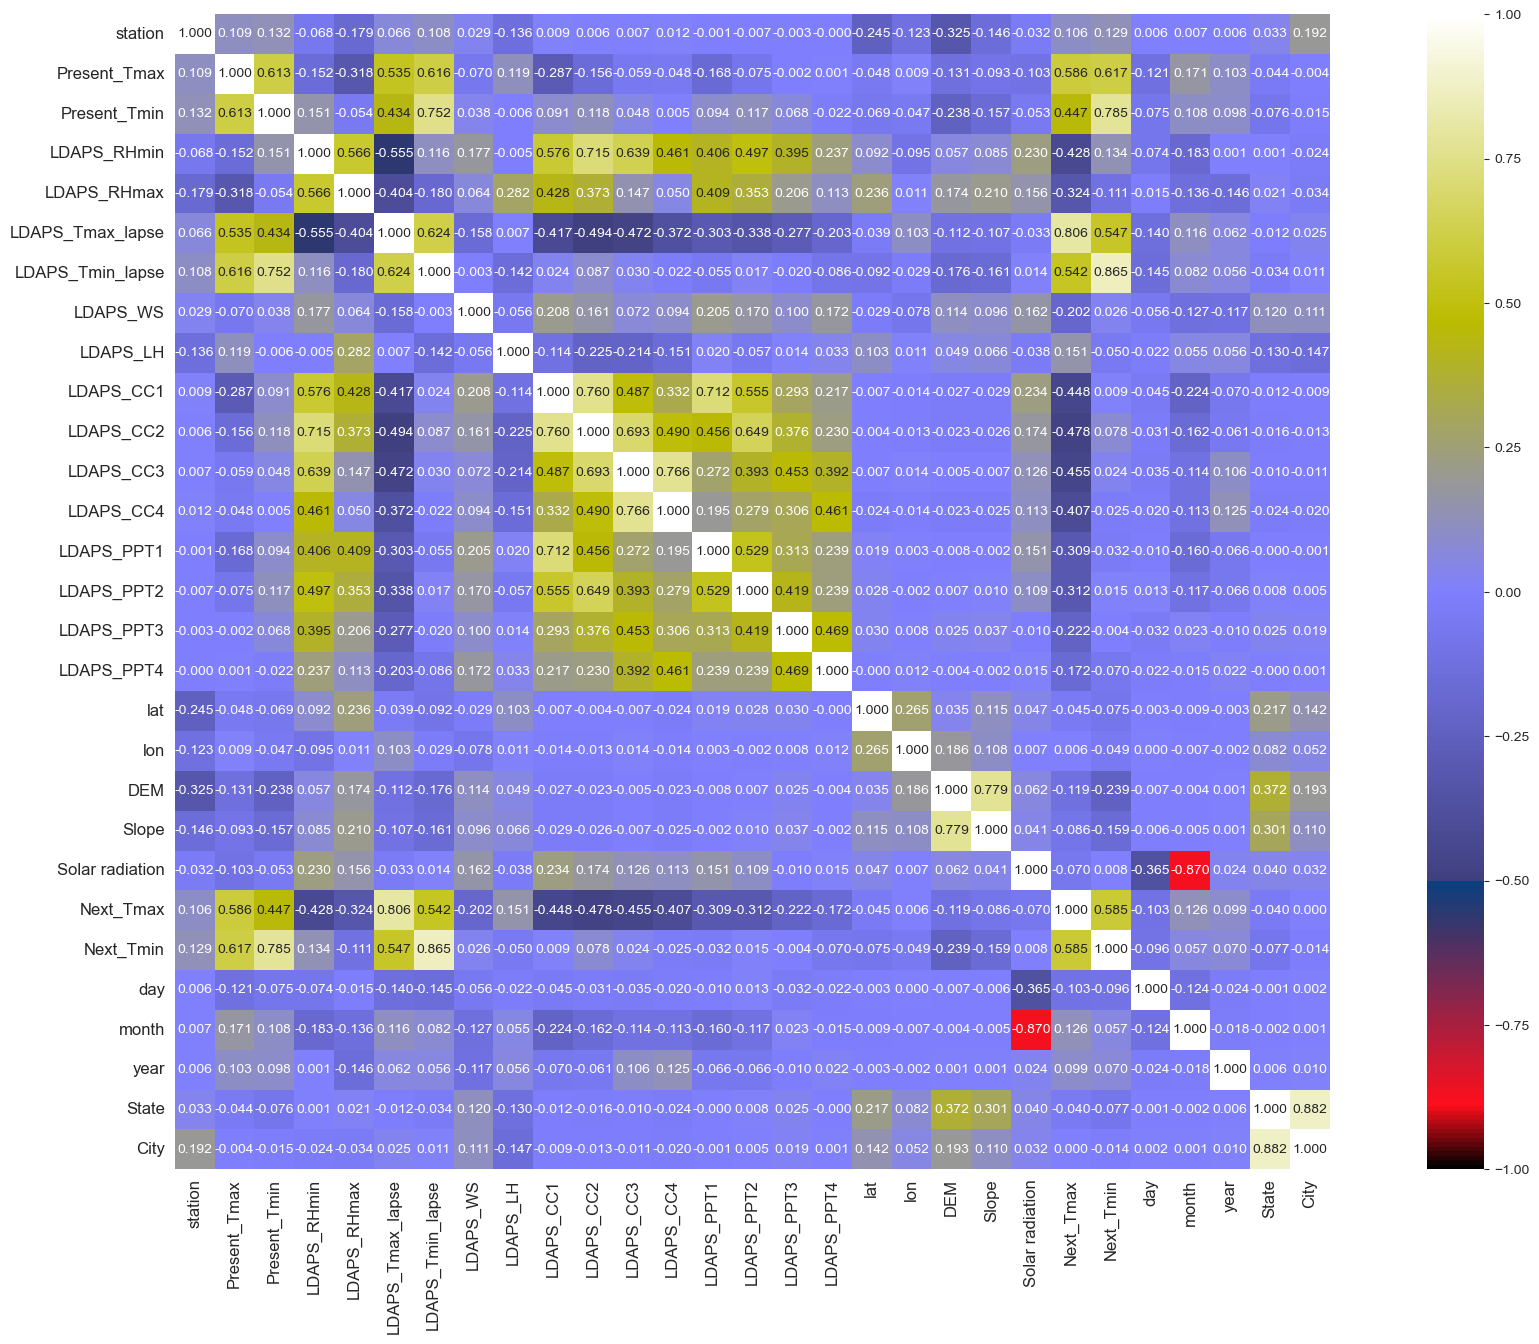

In [58]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

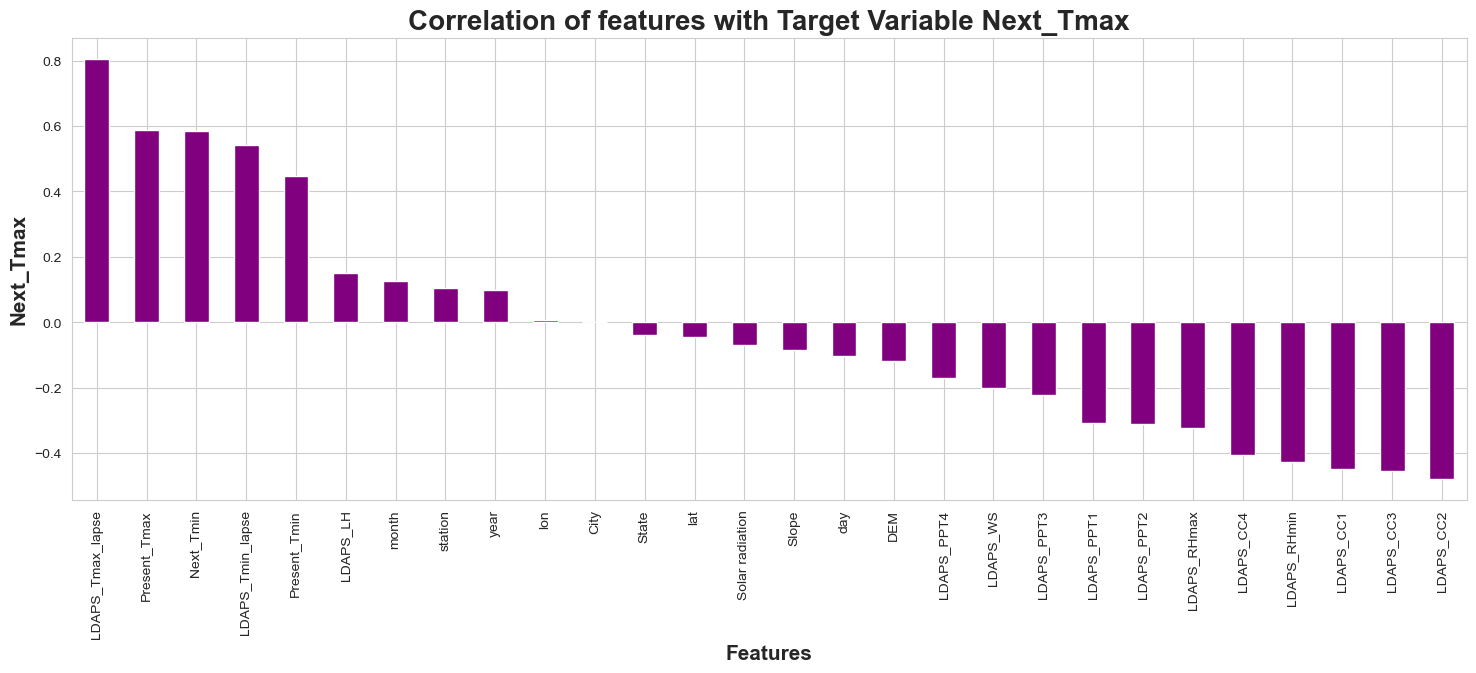

In [59]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

**Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.**

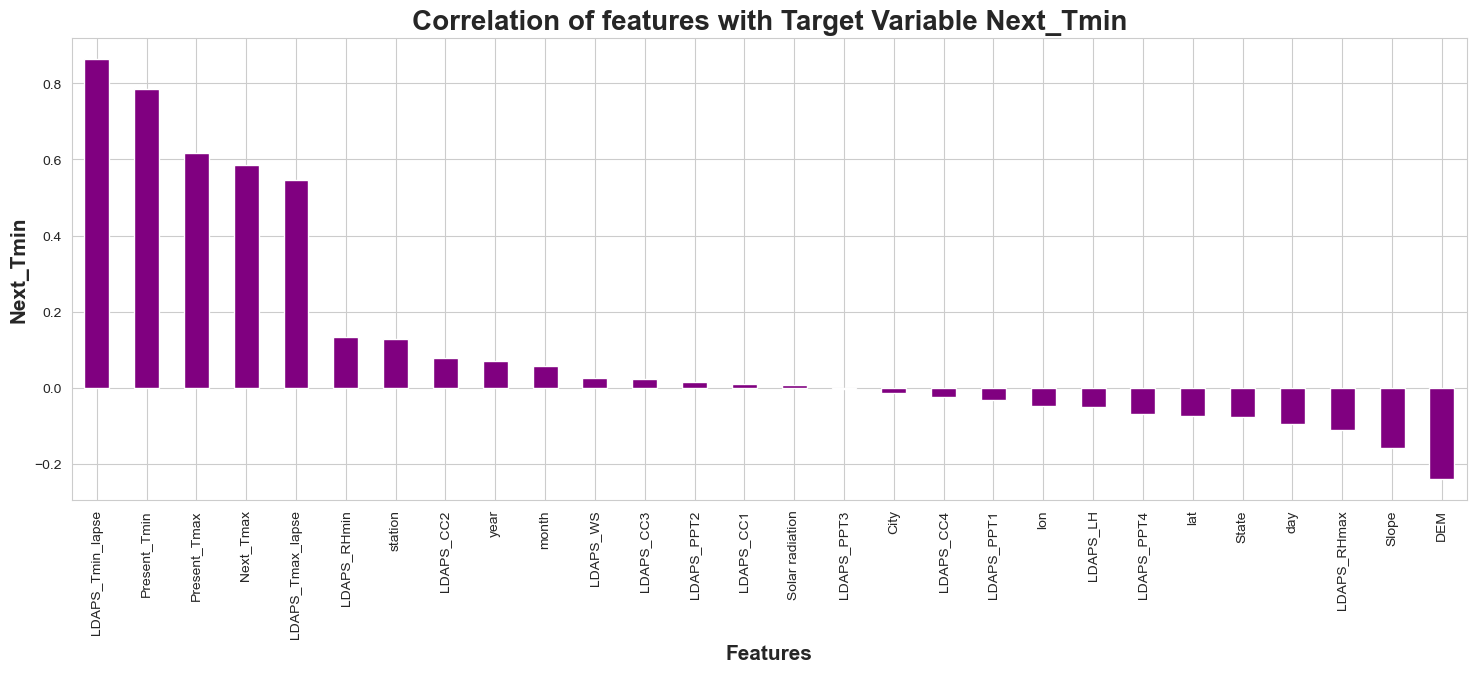

In [60]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

**Temperature related feature are moderately or highly correlated with Target Feature.**

# Machine Learning Model Building For Next_Tmax

## Standard Scaling

In [29]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity between features using variance_inflation_factor

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.467778           station
1     2.942316      Present_Tmax
2     3.534773      Present_Tmin
3     6.641380       LDAPS_RHmin
4     2.678900       LDAPS_RHmax
5     7.256866  LDAPS_Tmax_lapse
6     8.125318  LDAPS_Tmin_lapse
7     1.289939          LDAPS_WS
8     1.538667          LDAPS_LH
9     5.007571         LDAPS_CC1
10    6.080101         LDAPS_CC2
11    5.132901         LDAPS_CC3
12    3.040645         LDAPS_CC4
13    2.624348        LDAPS_PPT1
14    2.400859        LDAPS_PPT2
15    1.860336        LDAPS_PPT3
16    1.859556        LDAPS_PPT4
17    1.678455               lat
18    1.273876               lon
19    4.836986               DEM
20    3.247042             Slope
21  120.671695   Solar radiation
22    5.752284         Next_Tmin
23   26.939891               day
24  101.351795             month
25    1.113514              year
26    6.279897             State
27    5.902281              City

**Independent feature VIF is within permissible limit of 10**

## PCA

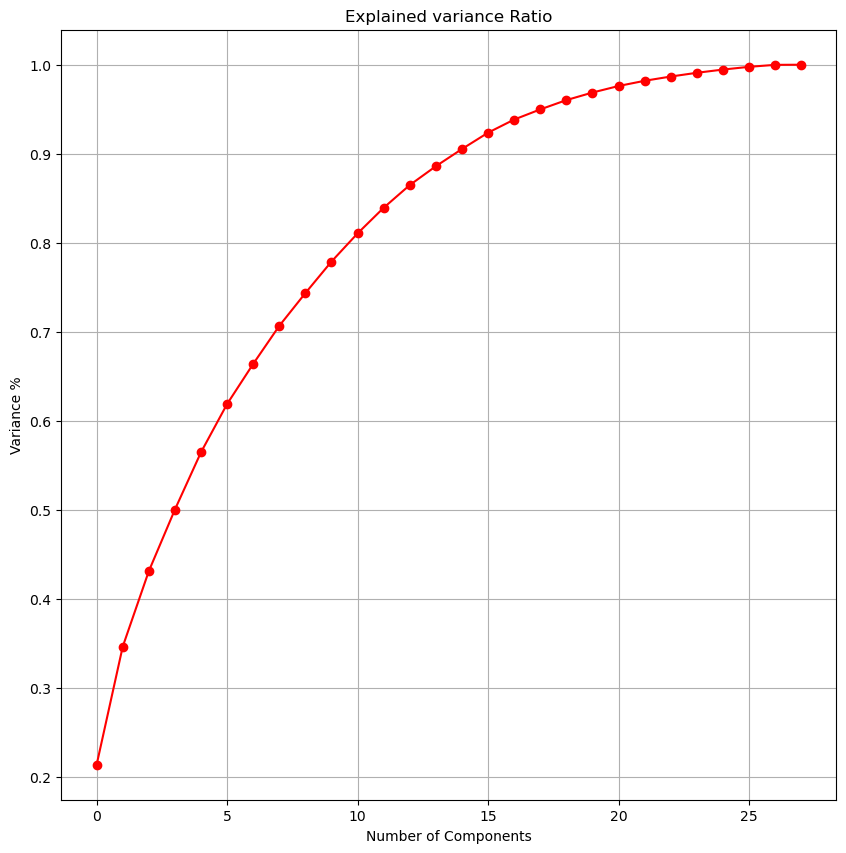

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data.  We shall pick the first 15 components for our prediction. </b>

In [33]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [34]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5193, 15)
Training target vector size: (5193,)
Test feature matrix size: (2559, 15)
Test target vector size: (2559,)


### Finding best Random state

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.814004905385677 on Random_state 200


## Linear Regression Base Model

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [29.77650458 33.81395483 30.49538992 ... 24.0078503  25.12223166
 30.94227328]


Actual Wins:
 3493    28.5
1147    34.2
3604    29.2
1691    29.6
5565    33.5
        ... 
6233    26.7
4866    33.7
7336    23.0
5041    21.6
654     31.9
Name: Next_Tmax, Length: 2559, dtype: float64


In [38]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.082337531695511
Mean squared error : 2.060697584235466
Root Mean Squared Error: 1.4355130038545336


 R2 Score :
0.7871533028403467


In [39]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7070059722254709


### Applying other ML Models

In [40]:
from sklearn.ensemble import BaggingRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
# Assuming you've already imported other necessary packages

# Now you can create instances of the regressors
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()

BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

In [42]:

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7130588901914806
Mean squared error : 0.9088982261469306
Root Mean Squared Error: 0.9533615401026678


 R2 Score :
0.9061211179313264


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6152623290347784
Mean squared error : 0.6884875975341919
Root Mean Squared Error: 0.8297515275877423


 R2 Score :
0.9288870369472939


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.069308323563892
Mean squared error : 2.1961782727627974
Root Mean Squared Error: 1.4819508334498812


 R2 Score :
0.7731596837365242


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.2086887341958932
Mean squared error : 2.2397272115109237
Root Mean Squared Error: 1.496571819696911


 R2 Score :
0.7686615721027468


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.894673204001614
Mean squared error : 1.3610598356645915
Root Mean Squared Error: 1.1666446912683361


 R2 Score :
0.8594179500795851


 Error of  XGBRegr

In [43]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.696054775674528


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7039322655218301


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4642911827411599


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6650409380525482


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7161638464835902


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_

# Hyper Parameter Tuning : GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [46]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.236 total time=   0.3s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.231 total time=   0.3s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.245 total time=   0.3s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.242 total time=   0.3s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[C